Se presentan las dependencias de paquetes para la ejecución de este notebook:

Creación del environment con comando conda:

* conda create -n Challenge_Airlines python=3.8.13
* conda activate Challenge_Airlines

Dependencias:

* conda install jupyter
* pip install numpy pandas
* pip install seaborn matplotlib
* pip install sklearn
* conda install -c conda-forge keras
* pip install tensorflow

Adicionalmente, se obtuvo el environment con todas las dependencias instaladas, el archivo se encuentra en este mismo repositorio y se llama "airlines_env.yml"

* Importamos las librerias necesarias

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

* Subimos el dataframe de trabajo

In [9]:
df = pd.read_csv("dataset_SCL.csv")
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


* Cambiamos los nombres de las columnas para que todos estén en minúsculas y sin signos de puntuación

In [10]:
col_names = {col: col.lower().replace('-','_') for col in df .columns.values}
df.rename(columns=col_names, inplace=True)
df.head()

,fecha_i,vlo_i,ori_i,des_i,emp_i,fecha_o,vlo_o,ori_o,des_o,emp_o,dia,mes,año,dianom,tipovuelo,opera,siglaori,siglades
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [11]:
# Analisis rapido de información
print('numero resgistros:',df.shape[0])
print('numero columnas:',df.shape[1])
print('nombre columnas:',df.columns)
print(df.info())

numero resgistros: 68206
numero columnas: 18
nombre columnas: Index(['fecha_i', 'vlo_i', 'ori_i', 'des_i', 'emp_i', 'fecha_o', 'vlo_o',
       'ori_o', 'des_o', 'emp_o', 'dia', 'mes', 'año', 'dianom', 'tipovuelo',
       'opera', 'siglaori', 'siglades'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fecha_i    68206 non-null  object
 1   vlo_i      68206 non-null  object
 2   ori_i      68206 non-null  object
 3   des_i      68206 non-null  object
 4   emp_i      68206 non-null  object
 5   fecha_o    68206 non-null  object
 6   vlo_o      68205 non-null  object
 7   ori_o      68206 non-null  object
 8   des_o      68206 non-null  object
 9   emp_o      68206 non-null  object
 10  dia        68206 non-null  int64 
 11  mes        68206 non-null  int64 
 12  año        68206 non-null  int64 
 13  dianom     68206 non-nul

In [12]:
# Se identificaron números de vuelo con letras, se observó que habia muy pocos casos estos, por lo que se supone que son los mismos vuelos, 
# Por lo anterior, se hace un reemplazo de los valores string por vacio. 
df['vlo_i'] = df['vlo_i'].replace({'A':''}, regex = True)
df['vlo_i'] = df['vlo_i'].replace({'B':''}, regex = True)
df['vlo_i'] = df['vlo_i'].replace({'P':''}, regex = True)
df['vlo_i'] = df['vlo_i'].replace({'R':''}, regex = True)

df['vlo_o'] = df['vlo_o'].replace({'A':''}, regex = True)
df['vlo_o'] = df['vlo_o'].replace({'B':''}, regex = True)
df['vlo_o'] = df['vlo_o'].replace({'P':''}, regex = True)
df['vlo_o'] = df['vlo_o'].replace({'R':''}, regex = True)

In [13]:
group_vlo_i_vlo_o = df.groupby(by=['vlo_i','vlo_o'])['des_i'].agg(['count']).reset_index()
#group_vlo_i_vlo_o.to_csv('group_vlo_i_vlo_o.csv', sep=',', encoding='utf-8')
group_vlo_i_vlo_o['vlo_i'] = group_vlo_i_vlo_o['vlo_i'].astype('float')
group_vlo_i_vlo_o['vlo_o'] = group_vlo_i_vlo_o['vlo_o'].astype('float')
#group_vlo_i_vlo_o['diferentes'] = np.where((df['vlo_i'] == '1'),1, 0)
group_vlo_i_vlo_o = group_vlo_i_vlo_o[group_vlo_i_vlo_o['vlo_i'] != group_vlo_i_vlo_o['vlo_o']]
group_vlo_i_vlo_o.sort_values(['count',],ascending = False)

# Existen 102 casos donde el número de vuelo programado es diferente al número de vuelo de operación, no parecece ser un gran problema,
# por lo que dejaremos entrar estos registros en el análisis.

,vlo_i,vlo_o,count
621,4501.0,1001.0,19
625,4503.0,1003.0,11
628,4503.0,1303.0,5
762,7811.0,1101.0,3
738,702.0,700.0,3
531,293.0,1101.0,2
767,7813.0,1113.0,2
763,7811.0,1103.0,2
740,704.0,702.0,2
710,624.0,922.0,2


In [14]:
# Nombre ciudad destino vs Código de ciudad de destino programado
group_siglades_des_i = df.groupby(by=['siglades','des_i'])['des_i'].agg(['count']).reset_index()
#group_siglades_des_i.to_csv('group_siglades_des_i.csv', sep=',', encoding='utf-8')
group_siglades_des_i
# Se observa que existen ciudades destino que tienen más de un código, sería necesario preguntar a la aerolínea que significa esto, ya que
# por ejemplo, la ciudad de Buenos Aires presenta 3,094, 3,240 y 1 casos con los códigos SABE, SAEZ y SEGU, respectivamente.
# Por ahora no representa un problema.

,siglades,des_i,count
0,Antofagasta,SCFA,5786
1,Arica,SCAR,2436
2,Asuncion,SGAS,232
3,Atlanta,KATL,358
4,Auckland N.Z.,NZAA,361
5,Balmaceda,SCBA,839
6,Bariloche,SAZS,2
7,Bogota,SKBO,1604
8,Buenos Aires,SABE,3094
9,Buenos Aires,SAEZ,3240


* Identificar faltantes

In [15]:
def faltantes(df):
    return df.isna().sum()
           #df.isnull().sum()

faltantes(df)
# Se observa que unicamete se tiene un valor ausente en la comlumna vlo_o

fecha_i      0
vlo_i        0
ori_i        0
des_i        0
emp_i        0
fecha_o      0
vlo_o        1
ori_o        0
des_o        0
emp_o        0
dia          0
mes          0
año          0
dianom       0
tipovuelo    0
opera        0
siglaori     0
siglades     0
dtype: int64

* Verificar el único registro que contiene un "NaN" en el campo número de vuelo programado (vlo_o).

In [16]:
print('Total de rows con nans:  ', df[df.isna().any(axis=1)].shape[0])
df[df.isna().any(axis=1)].head()
# No parece haber mucho proplema por quitar o dejar este unico registro, yo decido dejarlo.

Total de rows con nans:   1


,fecha_i,vlo_i,ori_i,des_i,emp_i,fecha_o,vlo_o,ori_o,des_o,emp_o,dia,mes,año,dianom,tipovuelo,opera,siglaori,siglades
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


* Verificar las fechas minimas y máximas de los vuelos

In [17]:
df["fecha_i_dt"] = pd.to_datetime(df["fecha_i"])
df["fecha_o_dt"] = pd.to_datetime(df["fecha_o"])

def data_profiling_fechas(cols, df):
    data_profiling = {}
    for col in cols:
        data_profiling[col] = {'uniques': df[col].nunique(), 
                               'prop_uniques': df[col].nunique()/df[col].shape[0],
                               'fecha_minima': df[col].min(),
                               'fecha_maxima': df[col].max(),
                               'anios_diferentes': df[col].dt.year.nunique(),
                               'dias_diferentes': df[col].max() - df[col].min()
                              } 
    return pd.DataFrame.from_dict(data_profiling)

data_profiling_fechas(['fecha_i_dt','fecha_o_dt'], df)
# Para la varable fecha_i_dt, se observa que tenemos información desde 2017-01-01 hasta 2017-12-31
# Para la varable fecha_o_dt, se observa que tenemos información desde 2017-01-01 hasta 2018-01-01

,fecha_i_dt,fecha_o_dt
uniques,53252,62774
prop_uniques,0.780752,0.920359
fecha_minima,2017-01-01 00:15:00,2017-01-01 00:04:00
fecha_maxima,2017-12-31 23:55:00,2018-01-01 00:12:00
anios_diferentes,1,2
dias_diferentes,364 days 23:40:00,365 days 00:08:00


* Funcion para revisar los datos y elegir una codificacion

In [18]:
# Con la siguiente definición voy a revisar los valores únicos de las variables con las que contamos:
def print_uniqueness(data=pd.DataFrame(), x = None):
    '''
    This function prints the unique values of the column specified in x
    for the data, and the number of unique values.
    data:= [pandas data frame], data
    x:= [string] column of the data to analize
    '''
    v = data[x].unique()
    print('Unique values of', x, ':')
    print(v)
    print('Number of unique values: ', len(v))
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
    print()
    return 0

# Iteramos sobre las variables categóricas
for c in ['fecha_i', 'vlo_i', 'ori_i', 'des_i', 'emp_i', 'fecha_o', 'vlo_o', 'ori_o', 'des_o', 'emp_o', 
          'dia', 'mes', 'año', 'dianom', 'tipovuelo','opera', 'siglaori', 'siglades']:
    print_uniqueness(df, c)

Unique values of fecha_i :
['2017-01-01 23:30:00' '2017-01-02 23:30:00' '2017-01-03 23:30:00' ...
 '2017-12-25 14:55:00' '2017-12-29 14:55:00' '2017-12-31 14:55:00']
Number of unique values:  53252
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Unique values of vlo_i :
['226' '912' '940' '92' '93' '401' '11' '1011' '1281' '1283' '1285' '1287'
 '1289' '1291' '2291' '98' '116' '176' '240' '295' '689' '250' '112' '118'
 '174' '249' '276' '495' '4495' '146' '7661' '7663' '9245' '9268' '9362'
 '6830' '702' '624' '28' '846' '709' '741' '8021' '8023' '8027' '8029'
 '8069' '8073' '8075' '8099' '8125' '8137' '8160' '8161' '9601' '9615'
 '9651' '9653' '9661' '9689' '9782' '9623' '1' '3' '7' '9' '13' '15' '17'
 '21' '23' '25' '41' '43' '51' '53' '55' '61' '71' '73' '75' '81' '83'
 '102' '104' '106' '108' '110' '120' '122' '128' '130' '132' '134' '140'
 '142' '150' '156' '160' '162' '164' '166' '170' '172' '180' '182' '184'
 '186' '188' '190' '192' '194' '196' '501' '503' '507' '521' '531' '55

#### Lo más relevante del análisis anterior es que:

* Existen 64 códigos de ciudades de destinos programados.

Unique values of des_i :
['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCVD' 'SCQP' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'SANT' 'YMML' 'SEQU' 'SANU' 'SAZN' 'SPSO' 'SAWH'
 'EGYP' 'SULS' 'SLCB' 'SARI']
Number of unique values:  64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* Existen 63 códigos de ciudades de destinos operados.

Unique values of des_o :
['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCQP' 'SCVD' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'KIAD' 'SANT' 'YMML' 'SANU' 'SAZN' 'SPSO' 'SAWH'
 'EGYP' 'SULS' 'SLCB']
Number of unique values:  63

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* Existen 62 códigos de ciudades de destinos programados, algo raro, ya que existen 64 ciudades de destino.

Unique values of siglades :
['Miami' 'Dallas' 'Buenos Aires' 'Toronto' 'Paris' 'Ciudad de Mexico'
 'Bogota' 'Roma' 'Londres' 'Ciudad de Panama' 'Atlanta' 'Sao Paulo'
 'Rio de Janeiro' 'Florianapolis' 'Madrid' 'Lima' 'Sydney' 'Houston'
 'Asuncion' 'Cataratas Iguacu' 'Puerto Montt' 'Punta Arenas'
 'Puerto Natales' 'Balmaceda' 'Temuco' 'Valdivia' 'Concepcion' 'La Serena'
 'Copiapo' 'Calama' 'Antofagasta' 'Iquique' 'Arica' 'Mendoza' 'Cordoba'
 'Montevideo' 'Castro (Chiloe)' 'Osorno' 'Orlando' 'Nueva York'
 'Guayaquil' 'Cancun' 'Punta Cana' 'Los Angeles' 'Auckland N.Z.'
 'Isla de Pascua' 'La Paz' 'Santa Cruz' 'Curitiba, Bra.' 'Quito'
 'Bariloche' 'Rosario' 'Washington' 'Tucuman' 'Melbourne' 'San Juan, Arg.'
 'Neuquen' 'Pisco, Peru' 'Ushuia' 'Puerto Stanley' 'Punta del Este'
 'Cochabamba']
Number of unique values:  62

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* Existen 30 códigos de aerolíneas de vuelos programados, pero existe 32 códigos de aerolíneas de vuelos operados.

Unique values of emp_i : Código aerolínea de vuelo programado.
['AAL' 'ACA' 'AFR' 'AMX' 'ARG' 'AUT' 'AVA' 'AZA' 'BAW' 'CMP' 'DAL' 'GLO'
 'IBE' 'KLM' 'QFU' 'UAL' 'LAP' 'TAM' 'SKU' 'LAN' 'LAW' 'JMR' 'LXP' 'LNE'
 'LPE' 'DSM' 'PUE' 'JAT' 'ONE' 'LRC']
Number of unique values:  30

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Unique values of emp_o : Código aerolínea de vuelo operado.
['AAL' 'ACA' 'AFR' 'AMX' 'ARG' 'AUT' 'AVA' 'AZA' 'BAW' 'CMP' 'DAL' 'GLO'
 'IBE' 'KLM' 'QFA' 'UAL' 'LAP' 'TAM' 'SKU' 'LAN' 'LXP' 'LNE' 'LPE'
 'DSM' '48O' '56R' 'JMR' 'PUE' 'JAT' 'TPU' 'ONE' 'LRC']
Number of unique values:  32

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* Existen 23 nombres de aerolíneas que operan

Unique values of opera :
['American Airlines' 'Air Canada' 'Air France' 'Aeromexico'
 'Aerolineas Argentinas' 'Austral' 'Avianca' 'Alitalia' 'British Airways'
 'Copa Air' 'Delta Air' 'Gol Trans' 'Iberia' 'K.L.M.' 'Qantas Airways'
 'United Airlines' 'Grupo LATAM' 'Sky Airline' 'Latin American Wings'
 'Plus Ultra Lineas Aereas' 'JetSmart SPA' 'Oceanair Linhas Aereas'
 'Lacsa']
Number of unique values:  23

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* El campo ori_i tiene un solo valor, por lo que se puede eliminar del análisis

Unique values of ori_i :
['SCEL']
Number of unique values:  1

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* El campo siglaori tiene un solo valor, por lo que se puede eliminar del análisis

Unique values of siglaori :
['Santiago']
Number of unique values:  1

* Existen 747 valores de vuelos programdos

Unique values of vlo_i :
Number of unique values:  747

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* Existen 854 valores de vuelos operados

Unique values of vlo_o :
Number of unique values:  854

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* A continuación se muestran los valores unicos de los campos: día, mes, año, dianom y tipo vuelo.

Unique values of dia :
[ 1  2  3  4  5  7  8 10 12 14 16 18 21 23 25 28 30 6 9 11 13 15 17 19 22 24 26 27 29 31 20]
Number of unique values:  31

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Unique values of mes :
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Number of unique values:  12

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Unique values of año :
[2017 2018]
Number of unique values:  2

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Unique values of dianom :
['Domingo' 'Lunes' 'Martes' 'Miercoles' 'Jueves' 'Sabado' 'Viernes']
Number of unique values:  7

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Unique values of tipovuelo :
['I' 'N']
Number of unique values:  2

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [19]:
# Se observa diferencia entre la cantidad de valores únicos de las variables vlo_i y vlo_o. Esto quiere decir que, en algunos casos los 
# vuelos programos no son los mismos que los vuelos operados. 
# Sugerencia: Si tuvieramos muchos casos diferentes, se pudiera generar una variable indicadora (0 y 1) que diga si el vuelo programado 
# fue el mismo que el vuelo operado (aunque en nuestro cas, dado el número de casos podría ser inicesario).

print('Numero de vuelos programados unicos:  ',len(df['vlo_i'].unique()))
print('Numero de vuelos operados unicos:  ',len(df['vlo_o'].unique()))

Numero de vuelos programados unicos:   747
Numero de vuelos operados unicos:   854


In [20]:
# Se observa diferencia entre la cantidad de valores únicos de las variables des_i y des_o.

print('Numero de vuelos programados unicos:  ',len(df['des_i'].unique()))
print('Numero de vuelos operados unicos:  ',len(df['des_o'].unique()))

Numero de vuelos programados unicos:   64
Numero de vuelos operados unicos:   63


#### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Número de vuelos por día de la semana.

             dianom
Viernes    0.150896
Jueves     0.150295
Lunes      0.148535
Domingo    0.143624
Miercoles  0.142539
Martes     0.141659
Sabado     0.122453
************************************************************
Tasa de vuelos promedio por día de la semana         dianom
mean  0.142857


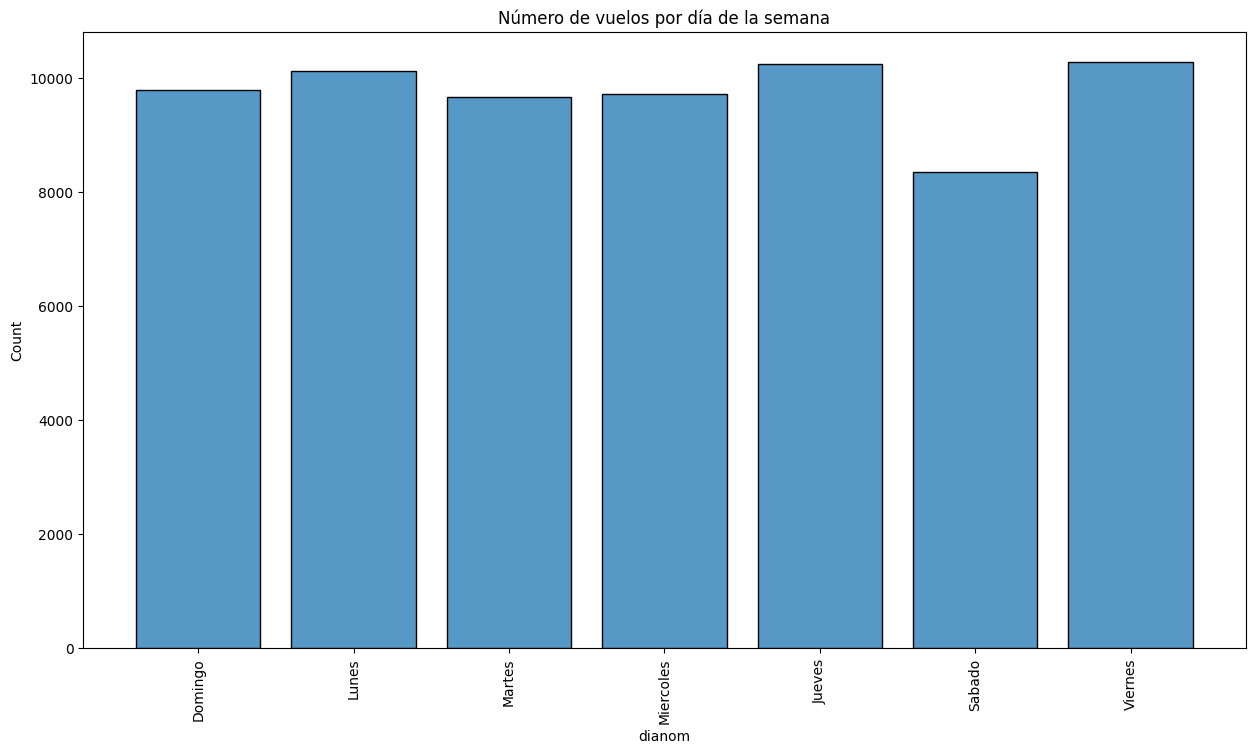

In [21]:
# Se observa la distribución del número de vuelos programados.
dianom_counts = pd.DataFrame(df.dianom.value_counts(normalize=True))
print(dianom_counts)
print('*'*60)
print('Tasa de vuelos promedio por día de la semana',dianom_counts.describe()[1:2])

plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="dianom", stat="count", shrink=0.8,).set(title = 'Número de vuelos por día de la semana')

Se observa que la tasa de número de vuelos por día de la semana es muy similar entre los todods los días (promedio 14.28%). A excepción del sábado que unicamente se tiene el 12.24% de los vuelos.

Dsitribución de número de vuelos por día del mes

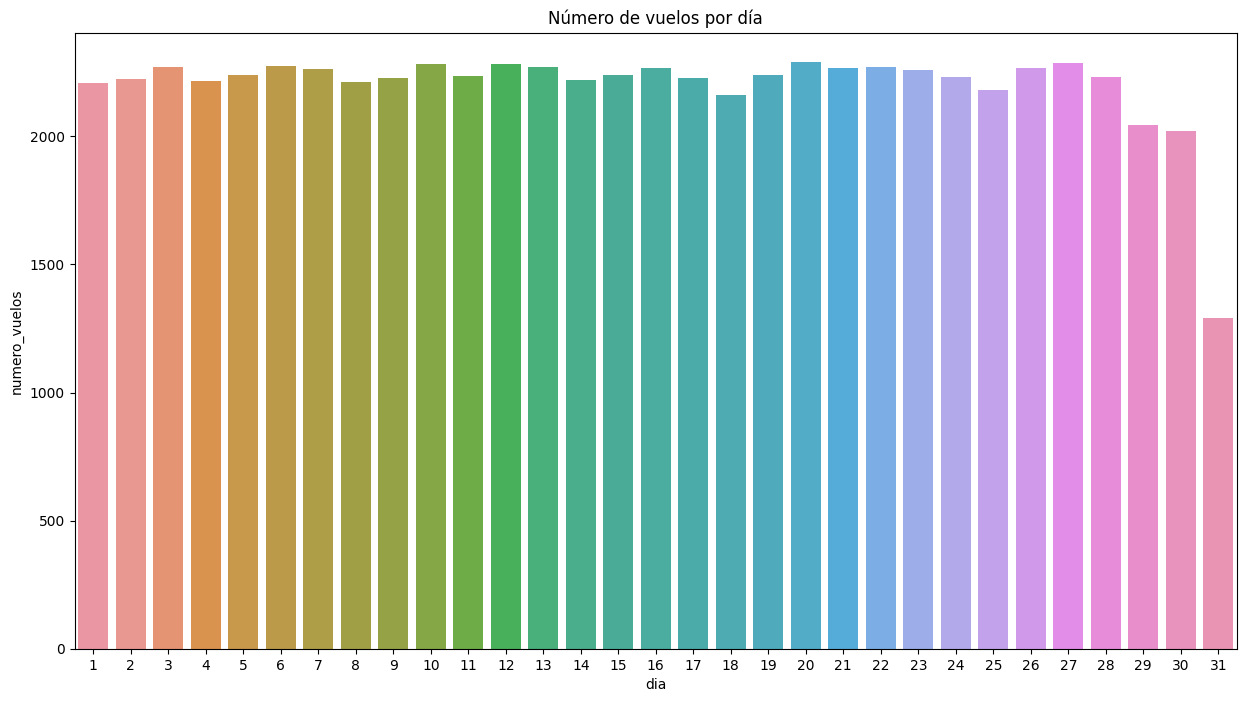

In [22]:
# Se observa la distribución de Número de vuelos por día
daym_delay=df.groupby(by=['dia'])['des_i'].agg(['count']).reset_index().rename(columns={'count': 'numero_vuelos'})
daym_delay=daym_delay.reset_index(drop=False)
daym_delay.head(7)

plt.figure(figsize=(15,8))
sns.barplot(x="dia", y="numero_vuelos", data=daym_delay).set(title = 'Número de vuelos por día')
plt.show()

En la gráfica de número de vuelos por día, se observa una distribución similar en el número de vuelos por día, a excepción de los 3 últimos días (29, 30 y 31).

Número de vuelos por día del mes

         mes
12  0.093188
1   0.089552
11  0.089142
10  0.088438
7   0.087852
8   0.084215
9   0.082251
2   0.081532
3   0.080374
5   0.076826
4   0.073601
6   0.073029
************************************************************
Tasa de vuelos promedio por mes mean    0.083333
Name: mes, dtype: float64


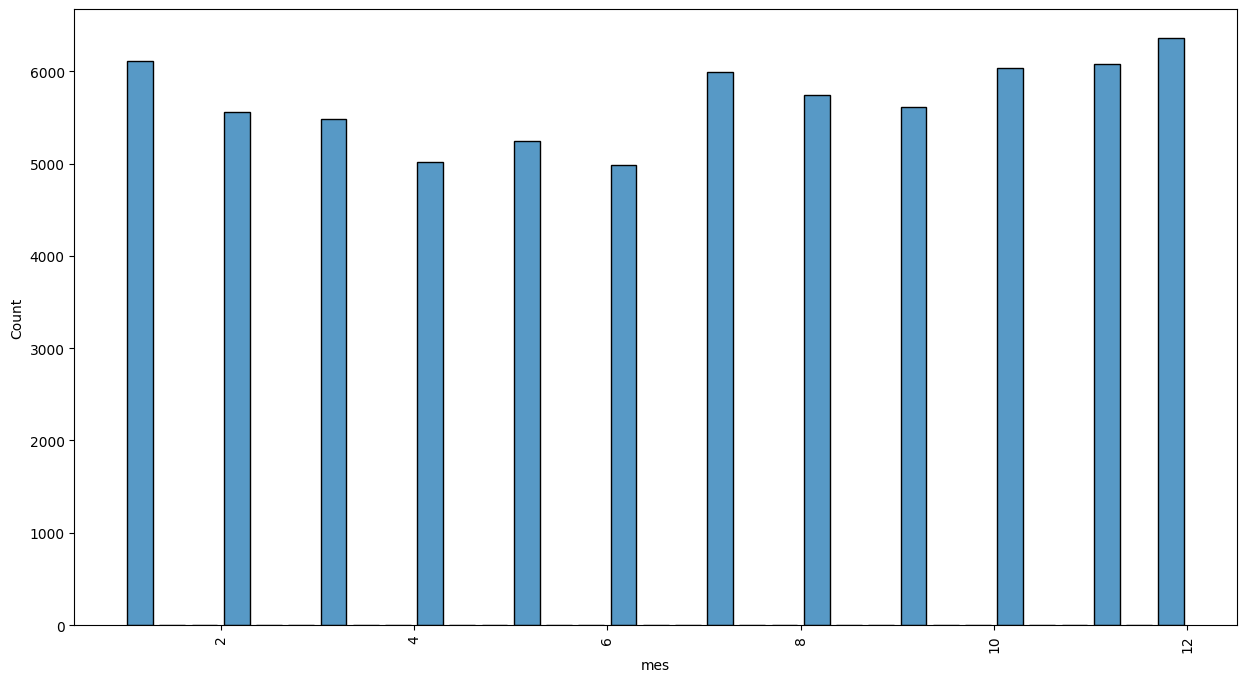

In [23]:
# Se observa la distribución del número de vuelos por mes
mes_counts = pd.DataFrame(df.mes.value_counts(normalize=True))
print(mes_counts)
print('*'*60)
print('Tasa de vuelos promedio por mes',mes_counts.mes.describe()[1:2])

plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="mes", stat="count", shrink=0.8, )

Se observa que en promedio los vuelos fueron 8.33% por mes. La menor tasa de vuelos es en el mes de junio y la mayor en diciembre.

Distribución fechas programadas por numero de vuelos por fecha (dia/mes/año)

[Text(0.5, 1.0, 'Top 50 de fechas programadas por numero de vuelos por dia')]

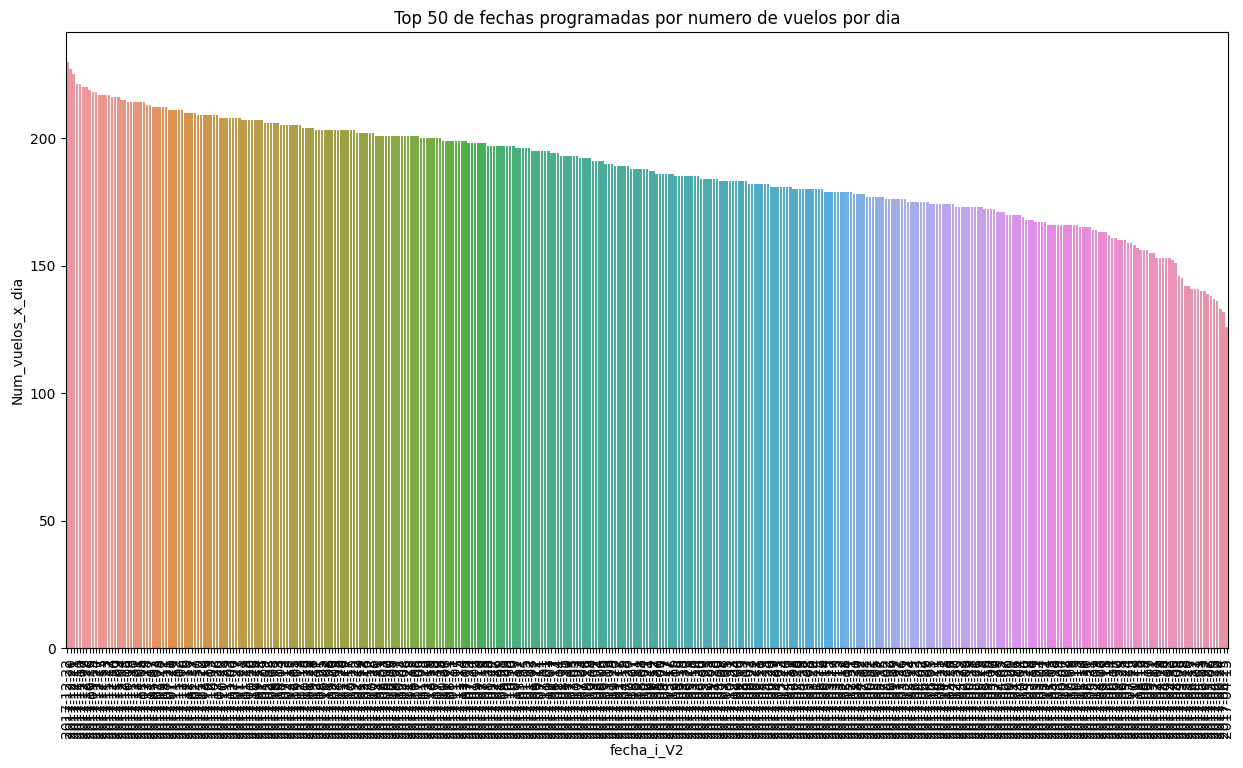

In [24]:
# Distribución del Top 50 de fechas programadas por numero de vuelos por dia
df["fecha_i_V2"] = pd.to_datetime(df["fecha_i"]).dt.date
df_num_vuelos_x_dia = df.groupby(by=['fecha_i_V2'])['vlo_i'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_x_dia'}).sort_values(['Num_vuelos_x_dia',],ascending = False)

plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.set_color_codes("pastel")
sns.barplot(data=df_num_vuelos_x_dia.sort_values(['Num_vuelos_x_dia',],ascending = False),x="fecha_i_V2", y="Num_vuelos_x_dia",).set(title = 'Top 50 de fechas programadas por numero de vuelos por dia')

Se observa que:

* Existen 365 fecha programadas diferentes. 
* La fecha programada con más vuelos es el 2017-12-22, ya que se tienen 230 vuelos en este día.
* La fecha programada con menos vuelos es el 2017-12-04, ya que se tienen 126 vuelos en este día.

In [25]:
print('shape:',df_num_vuelos_x_dia.shape)
df_num_vuelos_x_dia.head(5)

shape: (365, 2)


,fecha_i_V2,Num_vuelos_x_dia
355,2017-12-22,230
353,2017-12-20,227
354,2017-12-21,225
344,2017-12-11,221
313,2017-11-10,221


In [26]:
df_num_vuelos_x_dia.tail(5)

,fecha_i_V2,Num_vuelos_x_dia
118,2017-04-29,137
160,2017-06-10,136
174,2017-06-24,133
175,2017-06-25,132
104,2017-04-15,126


Distribución de número de vuelos programados

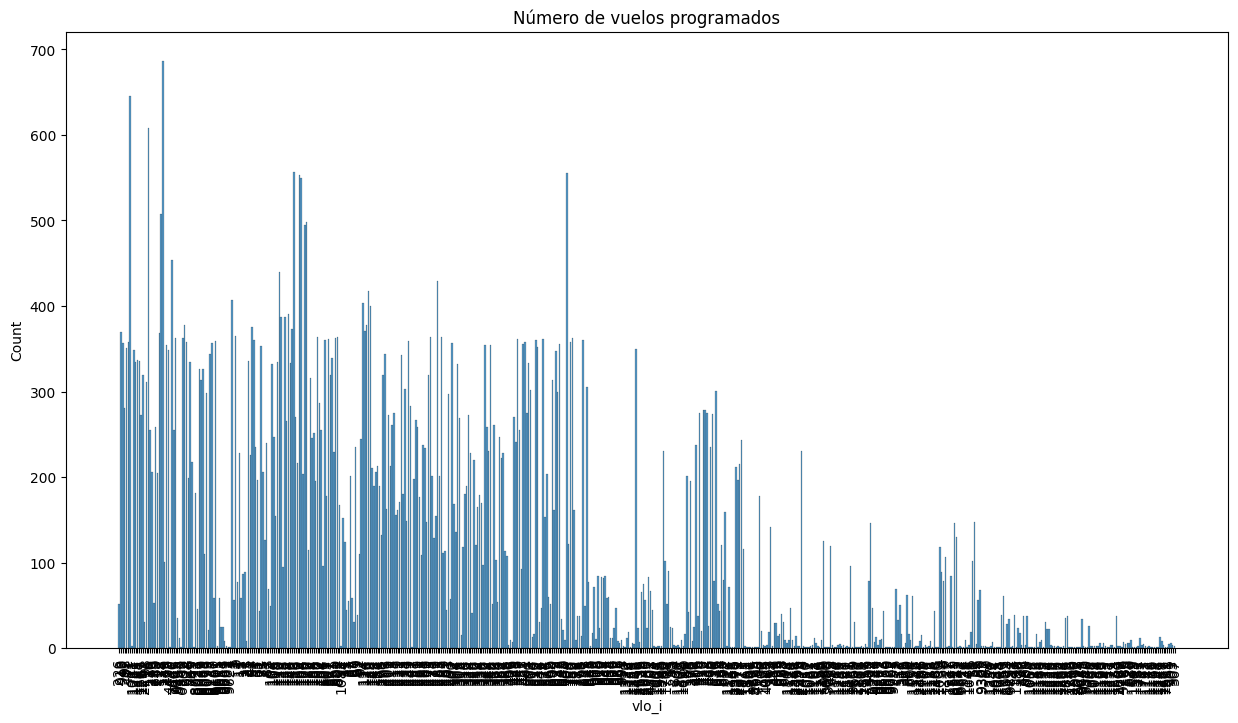

In [27]:
# Se observa la distribución del número de vuelos programados.

df['vlo_i'] = df['vlo_i'].astype('string')

plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="vlo_i", stat="count", shrink=0.8, ).set(title = 'Número de vuelos programados')

Existen varios número de vuelos programados que sobresalen del resto, como lo son el 174 con 686 vuelos, el vuelo 11 con 645 vuelos. Adicionalmente, existen vuelos como 7911 y 9956 que tuvieron un solo vuelo en todo el año.	

In [28]:
df_num_vuelos_programados = df.groupby(by=['vlo_i'])['vlo_o'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_programados'}).sort_values(['Num_vuelos_programados',],ascending = False)
print('shape:',df_num_vuelos_programados.shape)
df_num_vuelos_programados.head(5)

shape: (581, 2)


,vlo_i,Num_vuelos_programados
183,174,686
29,11,645
68,116,608
163,150,557
445,704,556


In [29]:
df_num_vuelos_programados.tail(5)

,vlo_i,Num_vuelos_programados
123,1269,1
124,1271,1
472,7959,1
471,7911,1
580,9956,1


Código de ciudad de destino programado

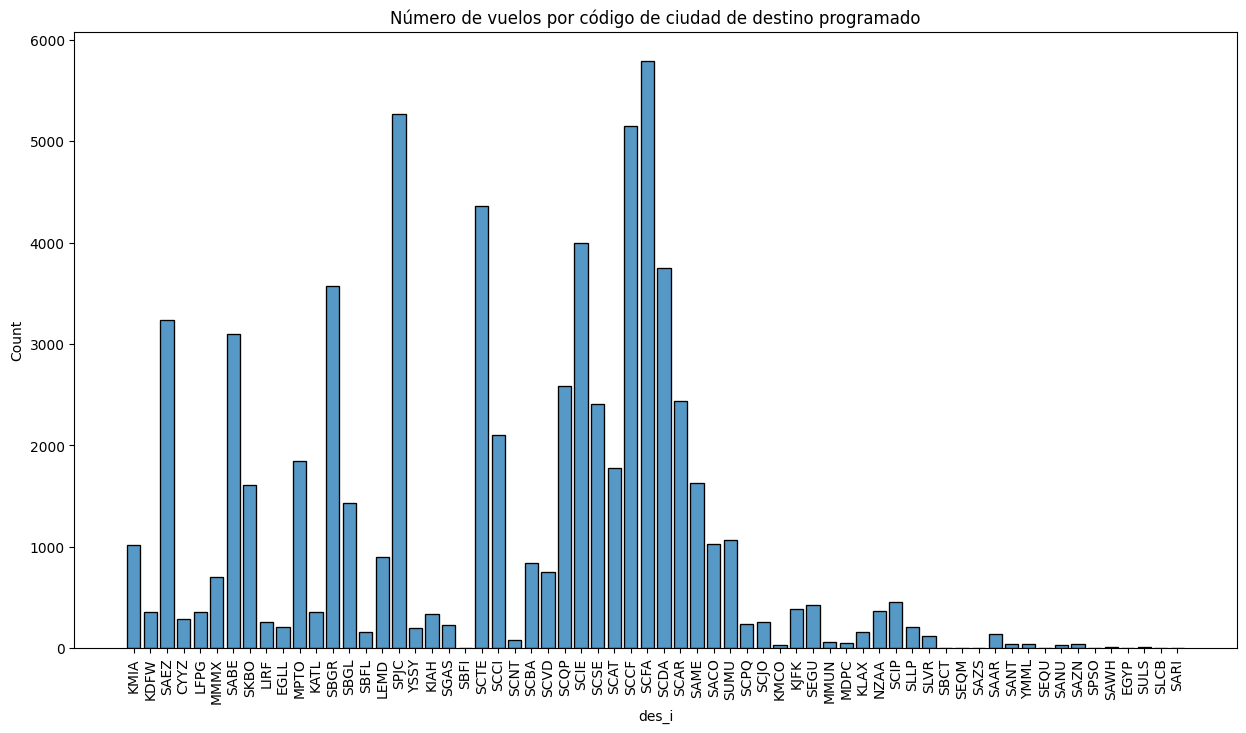

In [30]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="des_i", stat="count", shrink=0.8, ).set(title = 'Número de vuelos por código de ciudad de destino programado')

Existe un destino que muestra 5,787 vuelos programados (SCFA) y existen varios destinos que unicamente muestran 1 solo destino progrmado en todo el año analizado.

In [31]:
df_num_vuelos_cp_cd_destino_programado = df.groupby(by=['des_i'])['des_o'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_codigo_ciudad_destino_programado'}).sort_values(['Num_vuelos_codigo_ciudad_destino_programado',],ascending = False)
print('shape:',df_num_vuelos_cp_cd_destino_programado.shape)
df_num_vuelos_cp_cd_destino_programado.head(5)

shape: (64, 2)


,des_i,Num_vuelos_codigo_ciudad_destino_programado
40,SCFA,5787
58,SPJC,5270
37,SCCF,5145
48,SCTE,4357
41,SCIE,3995


In [32]:
df_num_vuelos_cp_cd_destino_programado = df.groupby(by=['des_i'])['des_o'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_codigo_ciudad_destino_programado'}).sort_values(['Num_vuelos_codigo_ciudad_destino_programado',],ascending = False)
print('shape:',df_num_vuelos_cp_cd_destino_programado.shape)
df_num_vuelos_cp_cd_destino_programado.tail(5)

shape: (64, 2)


,des_i,Num_vuelos_codigo_ciudad_destino_programado
25,SARI,1
30,SBFI,1
55,SLCB,1
51,SEQM,1
52,SEQU,1


Código de ciudad de destino operado

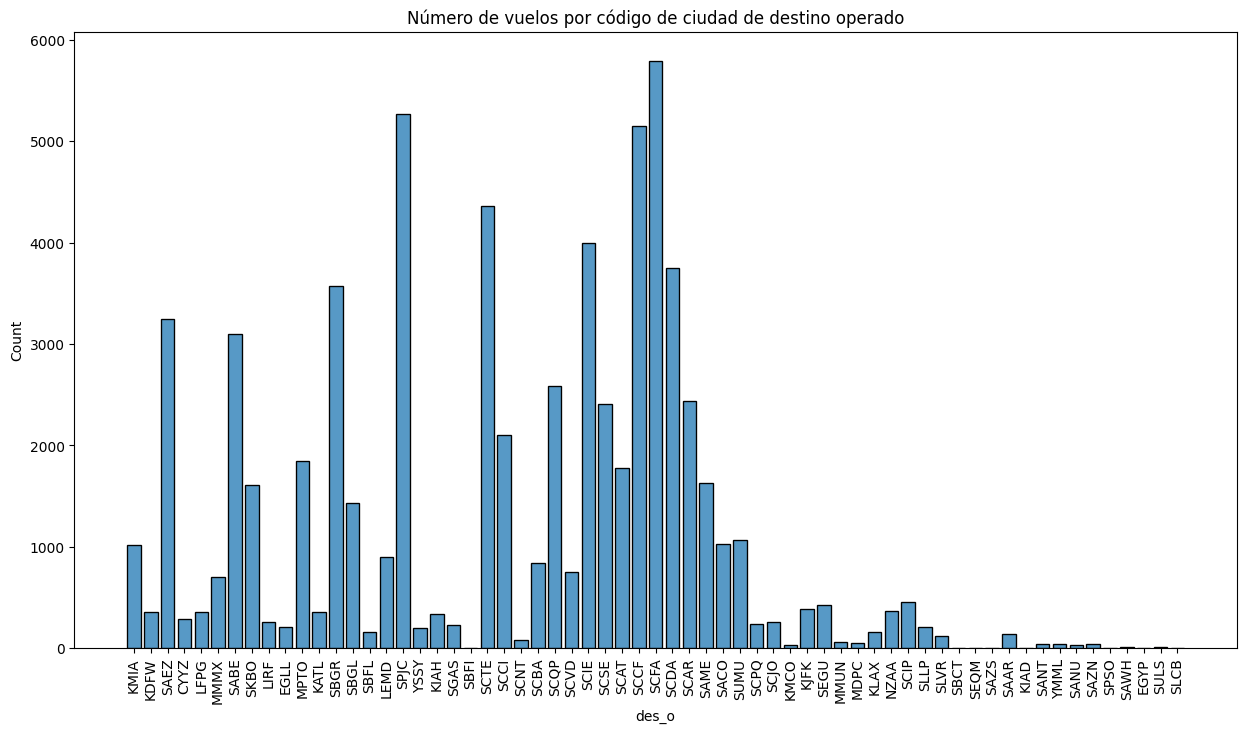

In [33]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="des_o", stat="count", shrink=0.8, ).set(title = 'Número de vuelos por código de ciudad de destino operado')

Existe un destino que muestra 5,786 vuelos programados (SCFA) y existen varios destinos que unicamente muestran 1 solo destino progrmado en todo el año analizado (EGYP).

In [34]:
df_num_vuelos_cod_cd_destino_operado = df.groupby(by=['des_o'])['des_i'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_codigo_ciudad_destino_operado'}).sort_values(['Num_vuelos_codigo_ciudad_destino_operado',],ascending = False)
print('shape:',df_num_vuelos_cod_cd_destino_operado.shape)
df_num_vuelos_cod_cd_destino_operado.head(5)

shape: (63, 2)


,des_o,Num_vuelos_codigo_ciudad_destino_operado
40,SCFA,5786
57,SPJC,5270
37,SCCF,5146
48,SCTE,4357
41,SCIE,3993


In [35]:
df_num_vuelos_cod_cd_destino_operado.tail(5)

,des_o,Num_vuelos_codigo_ciudad_destino_operado
30,SBFI,2
54,SLCB,1
5,KIAD,1
58,SPSO,1
2,EGYP,1


Número de vuelos por Tipo de vuelo

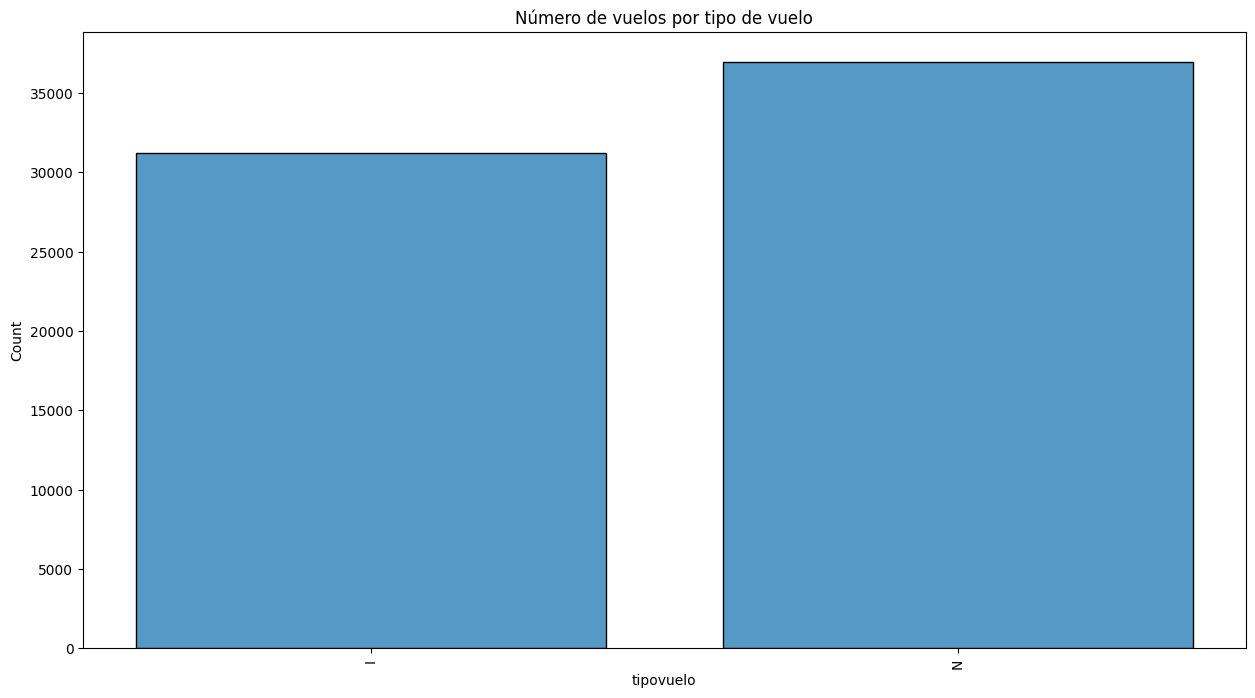

In [36]:
# Porcentaje del tipo de vuelo
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="tipovuelo", stat="count", shrink=0.8).set(title = 'Número de vuelos por tipo de vuelo')

El 54.2% de los vuelos analizados son nacionales y el 45.8% son internacionales

In [37]:
tipovuelo_counts = pd.DataFrame(df.tipovuelo.value_counts(normalize=True))
print(tipovuelo_counts)

   tipovuelo
N   0.541976
I   0.458024


Número de vuelos programados por Año-Mes

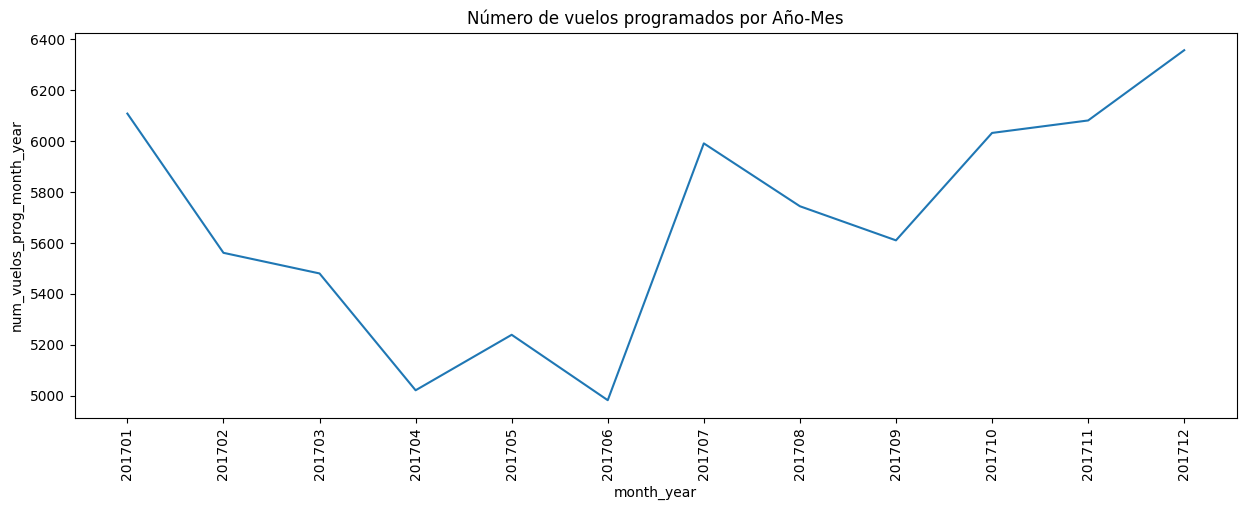

In [38]:
df['fecha_i_v3'] = df['fecha_i_V2'].astype('string') 
df_fecha_i = df[['fecha_i_v3','vlo_i']]
df_fecha_i['fecha_i_v3'] = df_fecha_i['fecha_i_v3'].str[:4] + df_fecha_i['fecha_i_v3'].str[5:7]
df_fecha_i.rename(columns={'fecha_i_v3': 'month_year'}, inplace=True)
df_fecha_i = df_fecha_i.groupby(by=['month_year'])['vlo_i'].agg(['count']).reset_index().rename(columns={'count': 'num_vuelos_prog_month_year'}).sort_values('month_year',ascending = True)
df_fecha_i = df_fecha_i.reset_index().rename(columns={'index': 'indice'})
#df_fecha_i

plt.figure(figsize = (15,5))
plt.xticks(rotation=90)
ax = sns.lineplot(x="month_year", y="num_vuelos_prog_month_year",data=df_fecha_i).set(title = 'Número de vuelos programados por Año-Mes')


Se observa una caida en el número de vuelos programados desde enero hasta abril, luego se recuperan un poco en mayo, vuelven a decrecer en junio, luego vuelve a crecer en julio, pero cae un poco en agosto y septiembre, pero se recupera en octubre, noviembre y diciembre, siendo este último mes donde alcanza su pico máximo.

Número de vuelos operados por Año-Mes

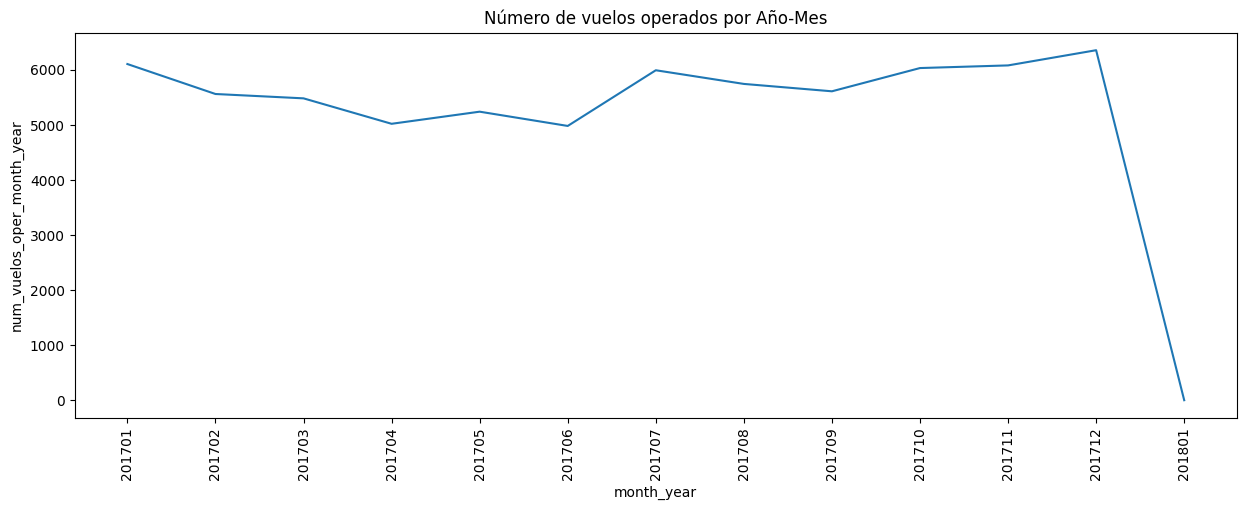

In [39]:
df["fecha_o_V2"] = pd.to_datetime(df["fecha_o"]).dt.date
df['fecha_o_V3'] = df['fecha_o_V2'].astype('string')
df_fecha_o = df[['fecha_o_V3','vlo_o']]
df_fecha_o['fecha_o_V3'] = df_fecha_o['fecha_o_V3'].str[:4] + df_fecha_o['fecha_o_V3'].str[5:7]
df_fecha_o.rename(columns={'fecha_o_V3': 'month_year'}, inplace=True)
df_fecha_o = df_fecha_o.groupby(by=['month_year'])['vlo_o'].agg(['count']).reset_index().rename(columns={'count': 'num_vuelos_oper_month_year'}).sort_values('month_year',ascending = True)
df_fecha_o = df_fecha_o.reset_index().rename(columns={'index': 'indice'})
#df_fecha_o

plt.figure(figsize = (15,5))
plt.xticks(rotation=90)
ax = sns.lineplot(x="month_year", y="num_vuelos_oper_month_year",data=df_fecha_o).set(title = 'Número de vuelos operados por Año-Mes')

En todo el año 2017 la tendencia del número de vuelos operados por mes es similar a la tendencia del número de vuelos programados por mes. Para enero 2018 unicamente tenemos unos pocos casos, esto sucede pues son los retrasos que ocurrieron a final del año 2017, quiere decir que un avión programado para despegar en diciembre 2017, despegó hasta el 1ro de enero del 2018.

Número de vuelos por nombre de aerolínea que opera

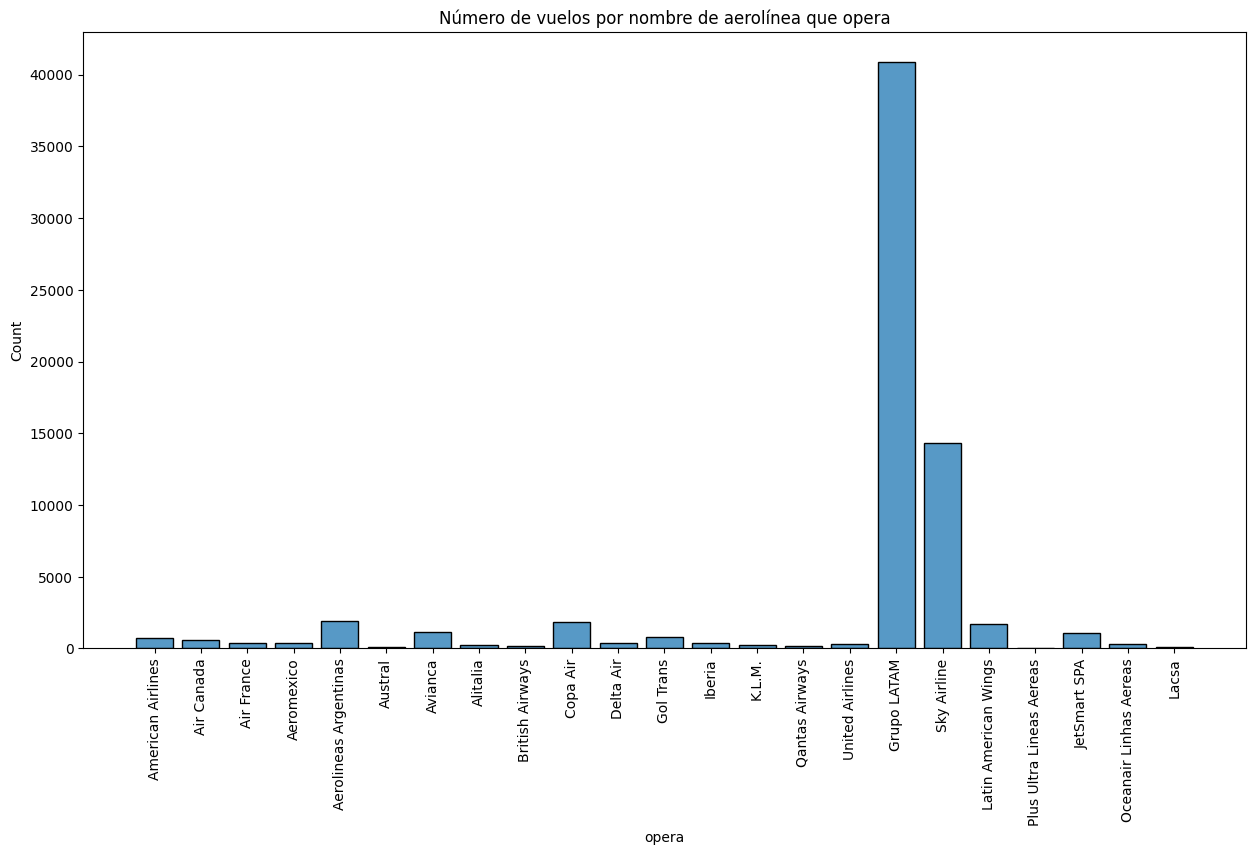

In [40]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="opera", stat="count", shrink=0.8).set(title = 'Número de vuelos por nombre de aerolínea que opera')

Es claro que la mayor cantidad de vuelos operados se concentran en la aerolinea "Grupo LATAM" con un total de 40,892 vuelos en el año 2017, seguido de "Sky Airline" que tal solo tiene 14,298 vuelos operados en el mismo año. 
La aerolinea que tiene menos vuelos es "Plus Ultra Lineas Aereas", pues unicamente operó 49 vuelos.

In [41]:
df_num_vuelos_x_aerolinea = df.groupby(by=['opera'])['des_o'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_x_aerolinea'}).sort_values(['Num_vuelos_x_aerolinea',],ascending = False)
print('shape:',df_num_vuelos_x_aerolinea.shape)
df_num_vuelos_x_aerolinea.head(5)

shape: (23, 2)


,opera,Num_vuelos_x_aerolinea
12,Grupo LATAM,40892
21,Sky Airline,14298
0,Aerolineas Argentinas,1949
9,Copa Air,1850
17,Latin American Wings,1674


In [42]:
df_num_vuelos_x_aerolinea.tail(5)

,opera,Num_vuelos_x_aerolinea
8,British Airways,205
20,Qantas Airways,195
16,Lacsa,92
6,Austral,74
19,Plus Ultra Lineas Aereas,49


Número de vuelos por nombre de ciudad de origen

In [43]:
df_num_vuelos_ciudad_dest_programados = df.groupby(by=['siglaori'])['des_o'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_x_ciudad_origen'}).sort_values(['Num_vuelos_x_ciudad_origen',],ascending = False)
print('shape:',df_num_vuelos_ciudad_dest_programados.shape)
df_num_vuelos_ciudad_dest_programados.tail(5)

shape: (1, 2)


,siglaori,Num_vuelos_x_ciudad_origen
0,Santiago,68206


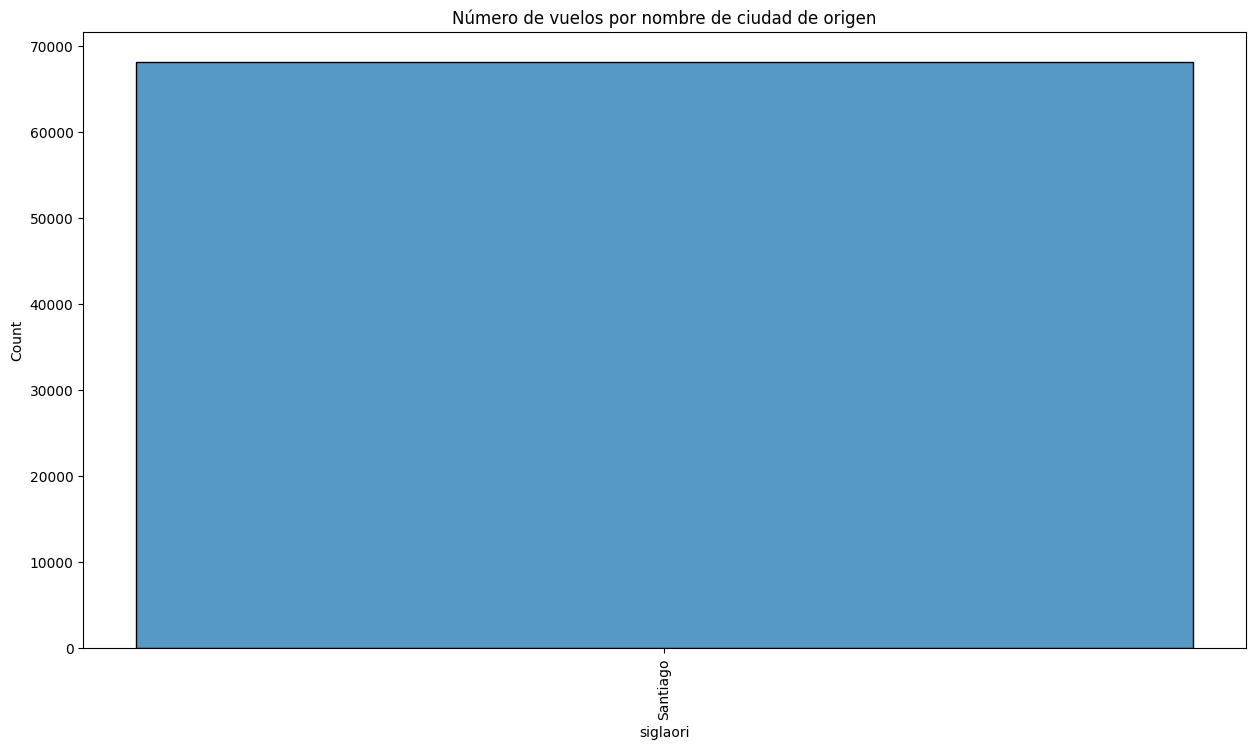

In [44]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="siglaori", stat="count", shrink=0.8).set(title = 'Número de vuelos por nombre de ciudad de origen')

Como ya se habia mencionado, se tiene una sola categoría para este campo, que significa que todos los vuelos salen de la ciudad de Santiago de Chile. Por tal motivo esta variables no será utilizada dentro de los siguientes análisis, pues no tiene variación alguna.

Número de vuelos por nombre de ciudad de destino

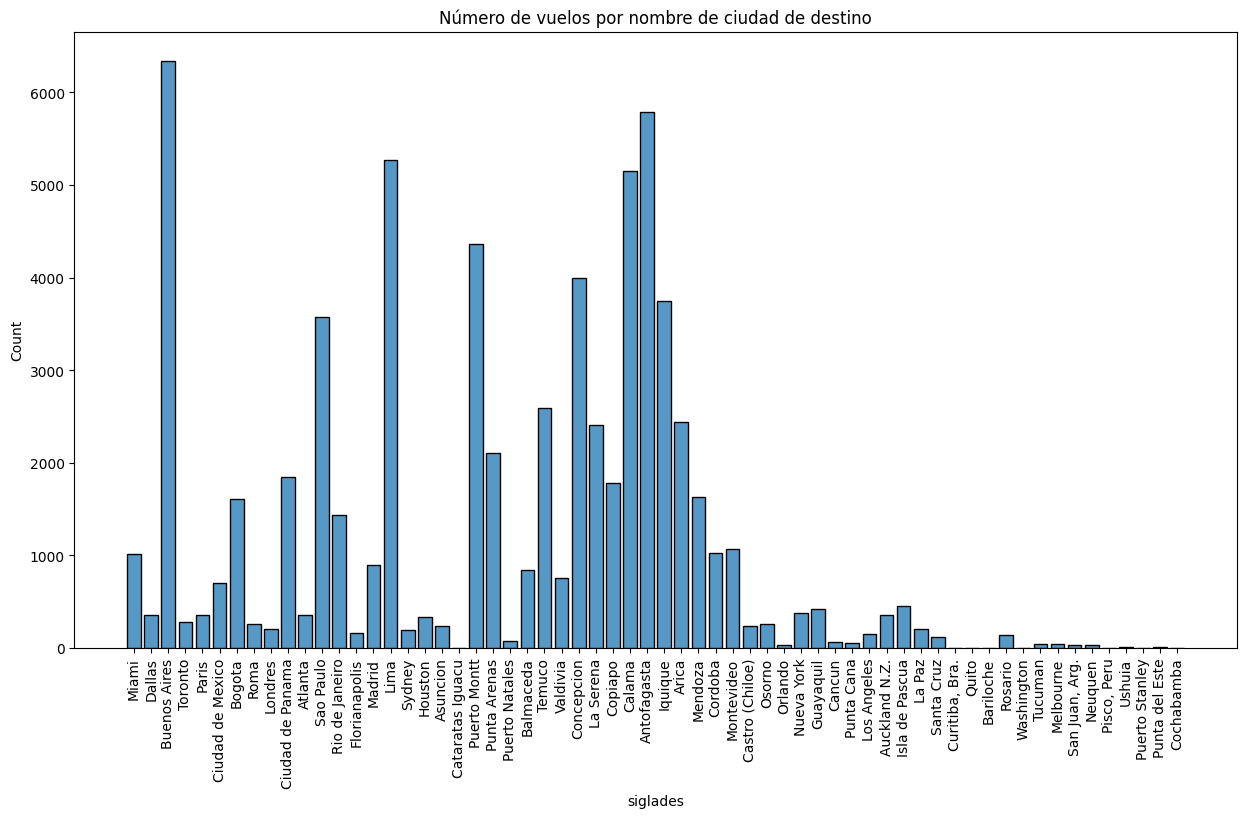

In [45]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="siglades", stat="count", shrink=0.8).set(title = 'Número de vuelos por nombre de ciudad de destino')

Las 3 ciudades de destino con mayor cantidad de vuelos operados son: Buenos Aires con 6,335 vuelos, Antofagasta con 5,786 vuelos y Lima con 5,270 vuelos.
Las 4 ciudades de destino con menor cantidad de vuelos operados son: Pisco (Peru),  Puerto Stanley, Cochabamba y Washington, ya que cada una presenta un solo vuelo operado.

In [46]:
df_num_vuelos_nom_ciudad_destino = df.groupby(by=['siglades'])['des_o'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_x_nombre_ciudad_destino'}).sort_values(['Num_vuelos_x_nombre_ciudad_destino',],ascending = False)
print('shape:',df_num_vuelos_nom_ciudad_destino.shape)
df_num_vuelos_nom_ciudad_destino.head(5)

shape: (62, 2)


,siglades,Num_vuelos_x_nombre_ciudad_destino
8,Buenos Aires,6335
0,Antofagasta,5786
28,Lima,5270
9,Calama,5146
42,Puerto Montt,4357


In [47]:
df_num_vuelos_nom_ciudad_destino.tail(5)

,siglades,Num_vuelos_x_nombre_ciudad_destino
12,Cataratas Iguacu,2
41,"Pisco, Peru",1
44,Puerto Stanley,1
15,Cochabamba,1
61,Washington,1


#### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no
* dif_min : diferencia en minutos entre Fecha-O y Fecha-I 
* atraso_15 : 1 si dif_min > 15, 0 si no
* periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I


Generación de columna "temporada_alta" : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

In [48]:
df['temporada_alta'] = np.where(((df['fecha_i_dt'] >= '2016-12-15 00:00:00') & (df['fecha_i_dt'] < '2017-03-04 00:00:00')) | 
                                ((df['fecha_i_dt'] >= '2017-07-15 00:00:00') & (df['fecha_i_dt'] < '2017-08-01 00:00:00')) |
                                ((df['fecha_i_dt'] >= '2017-07-15 00:00:00') & (df['fecha_i_dt'] < '2017-08-01 00:00:00')) |
                                ((df['fecha_i_dt'] >= '2017-12-15 00:00:00') & (df['fecha_i_dt'] < '2018-03-04 00:00:00')),1, 0)
pc_1 = pd.DataFrame(df.temporada_alta.value_counts(normalize=True))
print(pc_1)
df.head(2)

   temporada_alta
0        0.721359
1        0.278641


,fecha_i,vlo_i,ori_i,des_i,emp_i,fecha_o,vlo_o,ori_o,des_o,emp_o,dia,mes,año,dianom,tipovuelo,opera,siglaori,siglades,fecha_i_dt,fecha_o_dt,fecha_i_V2,fecha_i_v3,fecha_o_V2,fecha_o_V3,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01 23:30:00,2017-01-01 23:33:00,2017-01-01,2017-01-01,2017-01-01,2017-01-01,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02 23:30:00,2017-01-02 23:39:00,2017-01-02,2017-01-02,2017-01-02,2017-01-02,1


La tempoarada alta tiene dos categorias, los que son marcados como temporada alta (Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep) que representan el 27.86% del total de datos, mientras que el 72.13% de los datos no son temporada alta.

Generación de columna "dif_min" : diferencia en minutos entre Fecha-O y Fecha-I 

In [49]:
df['dif_min'] = df['fecha_o_dt'] - df['fecha_i_dt']
df['dif_min'] = df.dif_min.dt.total_seconds() / 60
df.head(3)

,fecha_i,vlo_i,ori_i,des_i,emp_i,fecha_o,vlo_o,ori_o,des_o,emp_o,dia,mes,año,dianom,tipovuelo,opera,siglaori,siglades,fecha_i_dt,fecha_o_dt,fecha_i_V2,fecha_i_v3,fecha_o_V2,fecha_o_V3,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01 23:30:00,2017-01-01 23:33:00,2017-01-01,2017-01-01,2017-01-01,2017-01-01,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02 23:30:00,2017-01-02 23:39:00,2017-01-02,2017-01-02,2017-01-02,2017-01-02,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,2017-01-03 23:30:00,2017-01-03 23:39:00,2017-01-03,2017-01-03,2017-01-03,2017-01-03,1,9.0


In [50]:
df.dif_min.describe()

count    68206.000000
mean         9.110855
std         19.313387
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: dif_min, dtype: float64

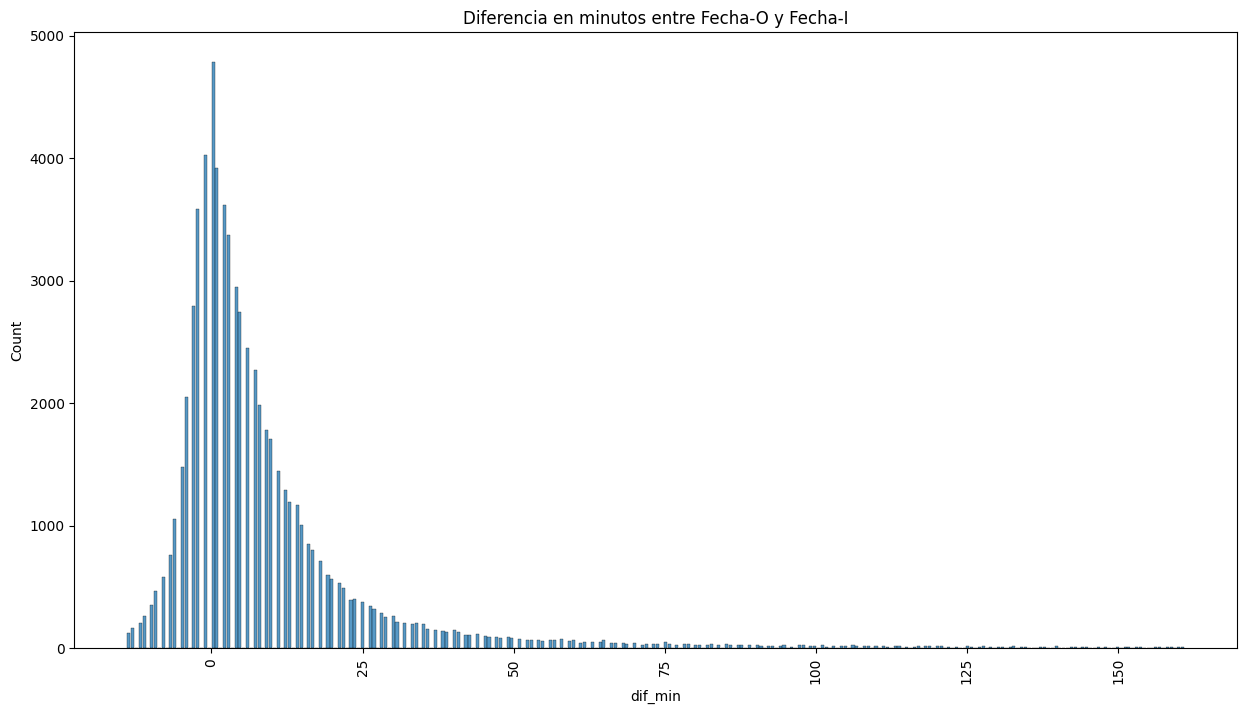

In [51]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="dif_min", stat="count", shrink=0.8).set(title = 'Diferencia en minutos entre Fecha-O y Fecha-I')

Si observamos las medididas de tendencia central de la distribuión de la columna "dif_min", observamos lo siguiente:
* El promedio de la diferencia en minutos entre Fecha-O y Fecha-I es de 9.11 minutos, con una desviación estandar de 19.3 minutos.
* Se tiene un mínimo de -14 minutos (vuelo adelantado) y un máximo de 161 minutos (vuelo retrasado). 
* El segundo cuartil (la mediana) es de 4 minutos, y si comparamos este valor con el promedio de la distribución vemos que es mucho menor, por lo que explica que la cola derecha de la distribución sea muy larga. 
* El tercer cuartil dice que el 75% de los vuelos tienen 12 menos de minutos de retraso.

Generación de columna "atraso_15" : 1 si dif_min > 15, 0 si no

In [52]:
#df = df.drop(['atraso_15'], axis=1)
df['atraso_15'] = df["dif_min"].apply(lambda x: 1 if int(x)> 15 else 0)
pc_atraso_15 = pd.DataFrame(df.atraso_15.value_counts(normalize=True))
print(pc_atraso_15)

# El 18.49% de los registro son atrasos cuando dif_min > 15

   atraso_15
0    0.81506
1    0.18494


Al aplicar la condición de "dif_min > 15", resulta que el 81.50% de las observaciónes no son retrasos, mientras que el 18.49% de las observaciones serán nuestros retrasos.

Generación de "periodo_dia" : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I

In [53]:
# periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I
from datetime import time

filtro_1 = (df.fecha_i_dt.dt.time >= time( 5, 0)) & (df.fecha_i_dt.dt.time <= time(11, 59))
filtro_2 = (df.fecha_i_dt.dt.time >= time(12, 0)) & (df.fecha_i_dt.dt.time <= time(18, 59))
filtro_3 = (df.fecha_i_dt.dt.time >= time(19, 0)) | (df.fecha_i_dt.dt.time <= time( 4, 59))

df[['periodo_dia']] = 'vacio'
df.loc[filtro_1, 'periodo_dia'] = 'mañana'
df.loc[filtro_2, 'periodo_dia'] = 'tarde'
df.loc[filtro_3, 'periodo_dia'] = 'noche'
pc_periodo_completo = pd.DataFrame(df.periodo_dia.value_counts(normalize=True))
print('Periodo completo')
print(pc_periodo_completo)
df.head(3)
print('*'*20)
print('shape df:',df.shape)

Periodo completo
        periodo_dia
tarde      0.373955
mañana     0.371698
noche      0.254347
********************
shape df: (68206, 28)


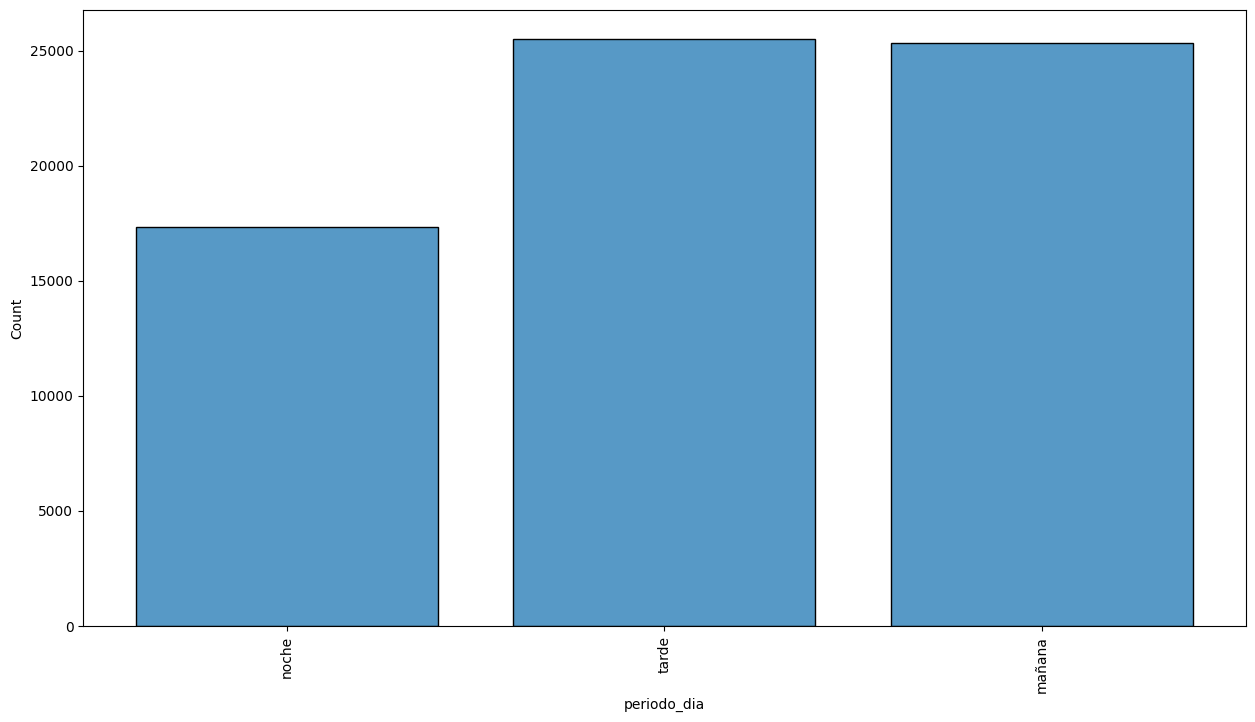

In [54]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="periodo_dia", stat="count", shrink=0.8)

La columna periodo día tiene 3 categorías que se distribuyen de la siguiente forma: la mañana concentra el 37.16% de los datos, la tarde un 37.16% y la noche un 25.43%.

In [55]:
df.head(2)

,fecha_i,vlo_i,ori_i,des_i,emp_i,fecha_o,vlo_o,ori_o,des_o,emp_o,dia,mes,año,dianom,tipovuelo,opera,siglaori,siglades,fecha_i_dt,fecha_o_dt,fecha_i_V2,fecha_i_v3,fecha_o_V2,fecha_o_V3,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01 23:30:00,2017-01-01 23:33:00,2017-01-01,2017-01-01,2017-01-01,2017-01-01,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02 23:30:00,2017-01-02 23:39:00,2017-01-02,2017-01-02,2017-01-02,2017-01-02,1,9.0,0,noche


Expórte las columnas generadas en un archivo synthetic_features.csv :

In [56]:
dt_synthetic_features = df[['fecha_i_dt','temporada_alta','dif_min','atraso_15','periodo_dia']]
dt_synthetic_features.to_csv("synthetic_features.csv", sep=',', encoding='utf-8')
dt_synthetic_features.head(5)

,fecha_i_dt,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,1,3.0,0,noche
1,2017-01-02 23:30:00,1,9.0,0,noche
2,2017-01-03 23:30:00,1,9.0,0,noche
3,2017-01-04 23:30:00,1,3.0,0,noche
4,2017-01-05 23:30:00,1,-2.0,0,noche


################################################################################################################################
################################################################################################################################

#### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?


En primer lugar revisemos la serie temporal de los atrasos.

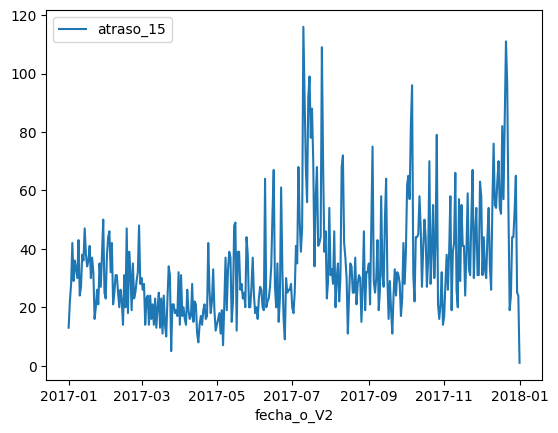

In [57]:
atrasos = df[df['atraso_15'] == 1]
atrasos[['fecha_o_V2','atraso_15']].groupby(['fecha_o_V2']).count().plot()
plt.show()

* Se observa que los  atrasos se incremetaron en el mes de julio, así como en el mes de diciembre.

Tasa de atraso por destino

<Figure size 4000x7000 with 0 Axes>

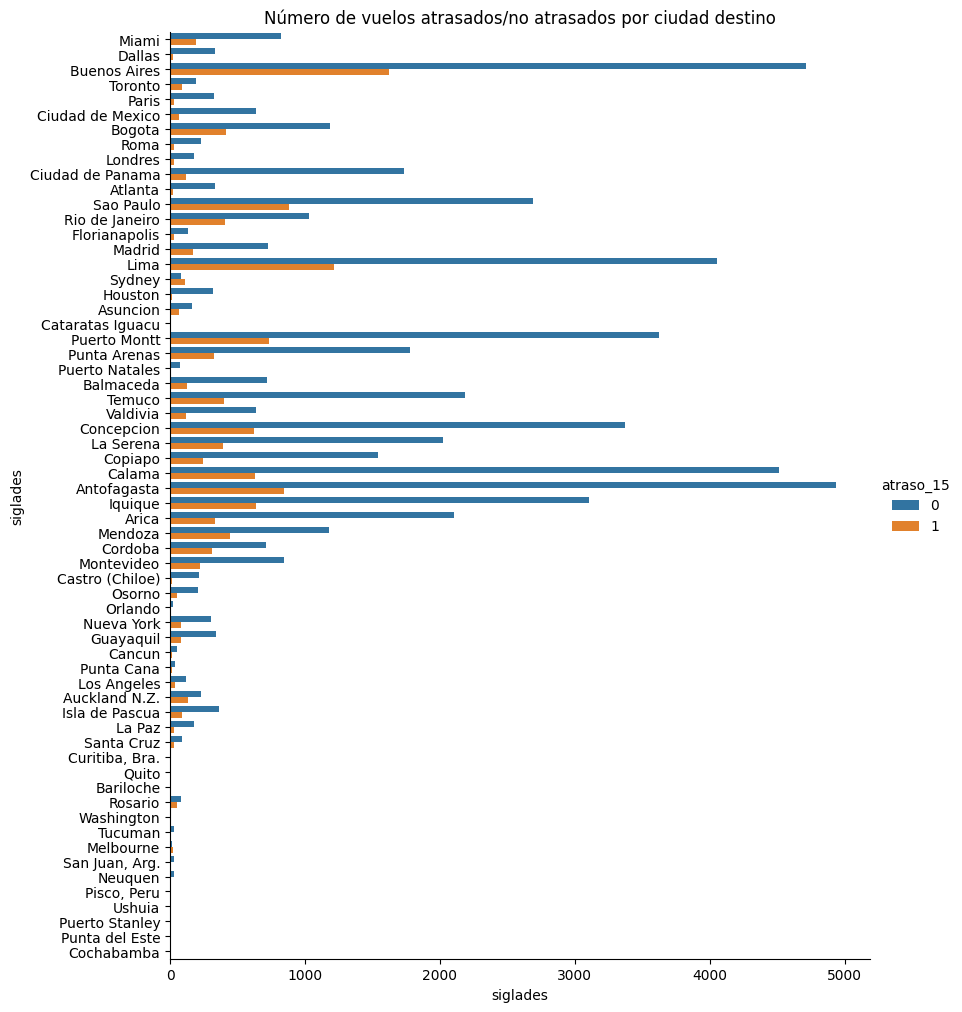

In [58]:
# Número de vuelos atrasados/no atrasados por ciudad destino
plt.figure(figsize=(40,70))
g=sns.catplot(y="siglades", hue="atraso_15" ,data=df, kind="count",height=10, aspect=.9)
g.set(title ="Número de vuelos atrasados/no atrasados por ciudad destino", xlabel='siglades') 
#sns.catplot(y="siglades", hue="atraso_15", col="atraso_15",data=df, kind="count",height=10, aspect=.9)
plt.show()

En la gráfica de número de vuelos por ciudad destino se observa que: 

* La mayor cantidad de vuelos se encuentran en los destinos: Antofagasta, Buenos Aires, Calama y Lima.

Ahora veamos la tasa de número de atrasos por destino

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


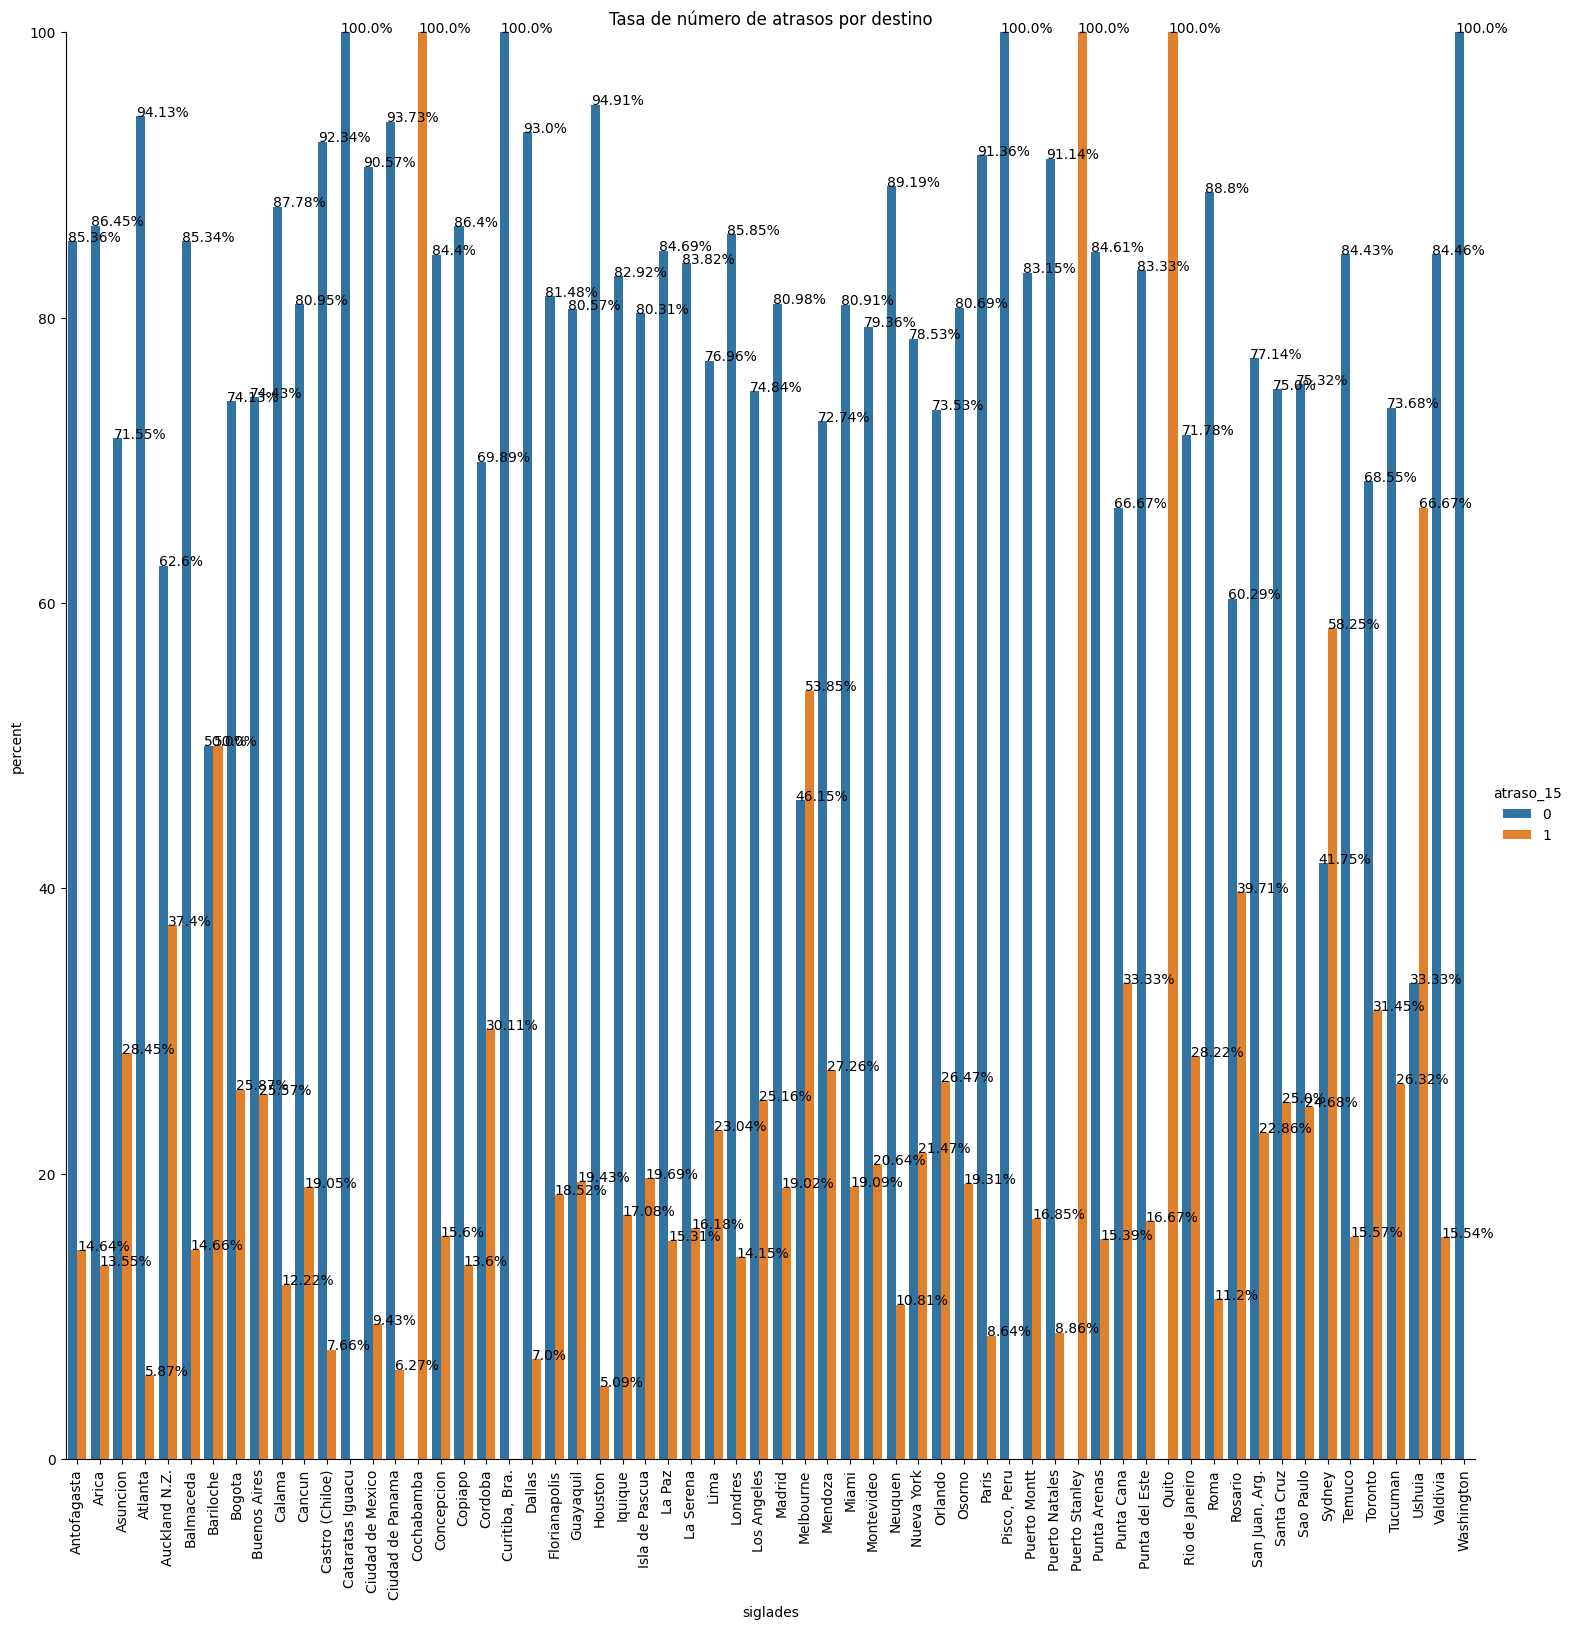

In [59]:
x,y = 'siglades','atraso_15'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#plt.figure(figsize = (5,8))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=15, )
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation = 90)
g.set(title ="Tasa de número de atrasos por destino", xlabel='siglades') 

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

##### Comentario para tasa de número de atrasos por destino:

* La tasa de atrasos para las ciudades destino con mayor número de vuelos son: Antofagasta tiene 14.64%, Buenos Aires tiene 25.57%, Calama tiene 12.22% y Lima tiene 23.04%.
* Además, se observa quea algunos de los destinos alcanzan el 100% de atrasos, sin embargo, estos destnos presentan muy pocos vuelos.

In [60]:
# Tasa de atraso por ciudad destino
tasa_atraso_cd_destino = pd.crosstab(df.siglades, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_cd_destino[0] = tasa_atraso_cd_destino[0] / tasa_atraso_cd_destino["Total"]
tasa_atraso_cd_destino[1] = tasa_atraso_cd_destino[1] / tasa_atraso_cd_destino["Total"]
print('dataframe:')
print(tasa_atraso_cd_destino)

dataframe:
atraso_15          siglades         0         1  Total
0               Antofagasta  0.853612  0.146388   5786
1                     Arica  0.864532  0.135468   2436
2                  Asuncion  0.715517  0.284483    232
3                   Atlanta  0.941341  0.058659    358
4             Auckland N.Z.  0.626039  0.373961    361
5                 Balmaceda  0.853397  0.146603    839
6                 Bariloche  0.500000  0.500000      2
7                    Bogota  0.741272  0.258728   1604
8              Buenos Aires  0.744278  0.255722   6335
9                    Calama  0.877769  0.122231   5146
10                   Cancun  0.809524  0.190476     63
11          Castro (Chiloe)  0.923404  0.076596    235
12         Cataratas Iguacu  1.000000  0.000000      2
13         Ciudad de Mexico  0.905714  0.094286    700
14         Ciudad de Panama  0.937297  0.062703   1850
15               Cochabamba  0.000000  1.000000      1
16               Concepcion  0.843977  0.156023   3993

In [61]:
print('*'*46)
print('Estadisticos para tasa de atraso por aerolinea:')
print(tasa_atraso_cd_destino[[0,1]].describe()[1:8])
print('*'*46)
print('Top 1 de tasa de vuelos a tiempo por ciudad destino:')
print(tasa_atraso_cd_destino.sort_values(0,ascending = False).head(1))
print('*'*60)
print('Top 1 de tasa de atraso por ciudad destino:')
print(tasa_atraso_cd_destino.sort_values(1,ascending = False).head(1))

**********************************************
Estadisticos para tasa de atraso por aerolinea:
atraso_15         0         1
mean       0.759973  0.240027
std        0.215747  0.215747
min        0.000000  0.000000
25%        0.736068  0.135712
50%        0.809843  0.190157
75%        0.864288  0.263932
max        1.000000  1.000000
**********************************************
Top 1 de tasa de vuelos a tiempo por ciudad destino:
atraso_15    siglades    0    1  Total
61         Washington  1.0  0.0      1
************************************************************
Top 1 de tasa de atraso por ciudad destino:
atraso_15        siglades    0    1  Total
44         Puerto Stanley  0.0  1.0      1


Nota: Se podría hacer el análisis para código de destino (des_o), pues se supone que la ciudad destino tiene solo código de ciudad. Debajo se muestra la agrupación que demuestra lo anterior.

In [62]:
group_siglades_des_o = df.groupby(by=['siglades','des_o'])['des_i'].agg(['count']).reset_index().rename(columns={'count': 'num_vuelos'}).sort_values(['siglades','des_o'],ascending = True)
group_siglades_des_o

,siglades,des_o,num_vuelos
0,Antofagasta,SCFA,5786
1,Arica,SCAR,2436
2,Asuncion,SGAS,232
3,Atlanta,KATL,358
4,Auckland N.Z.,NZAA,361
5,Balmaceda,SCBA,839
6,Bariloche,SAZS,2
7,Bogota,SKBO,1604
8,Buenos Aires,SABE,3094
9,Buenos Aires,SAEZ,3241


Tasa de número de atrasos por aerolínea

<Figure size 4000x7000 with 0 Axes>

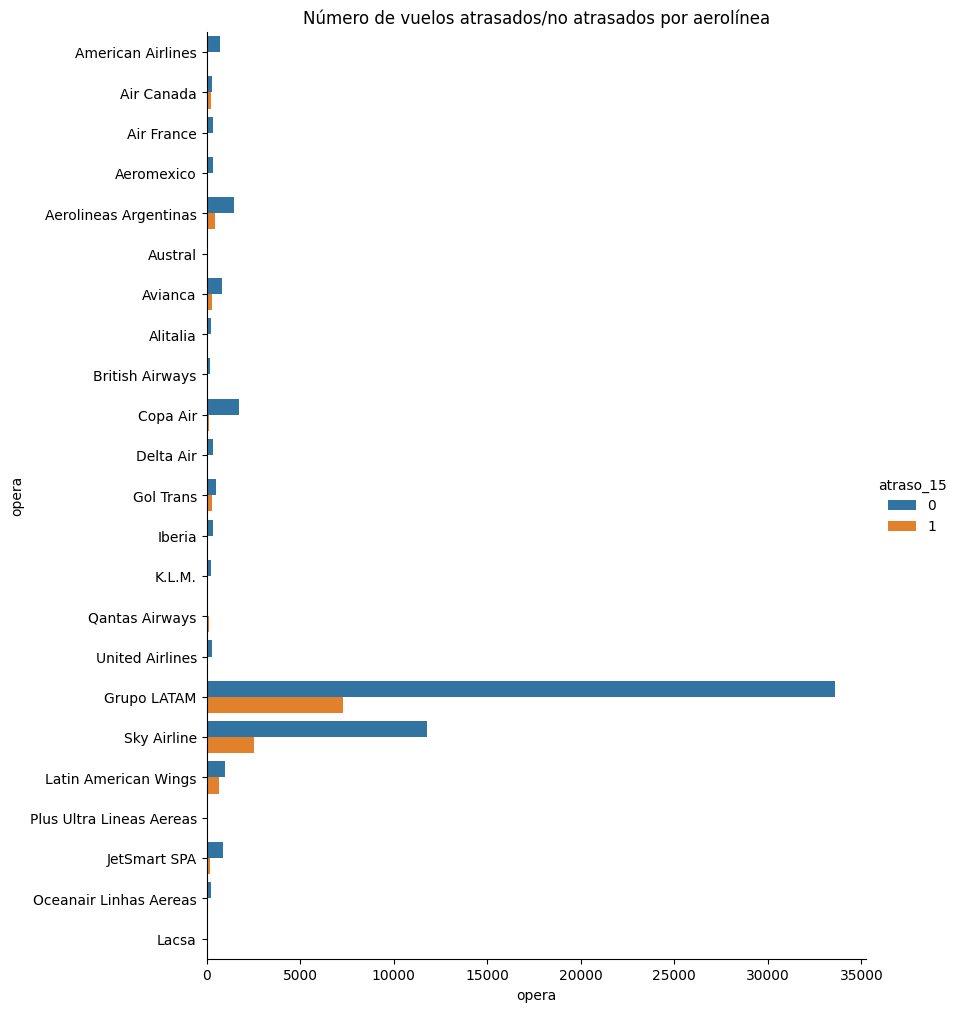

In [63]:
# Número de vuelos atrasados/no atrasados por aerolínea
plt.figure(figsize=(40,70))
g=sns.catplot(y="opera", hue="atraso_15" ,data=df, kind="count",height=10, aspect=.9)
g.set(title ="Número de vuelos atrasados/no atrasados por aerolínea", xlabel='opera') 
plt.show()

Como ya se habia dicho más arriba, la mayor cantidad de vuelos operados se concentran en la aerolinea "Grupo LATAM" con un total de 40,892 vuelos en el año 2017, pero ahora se observa que esta aerolina tiene aproximadamente 7  mil vuelos retrasados.

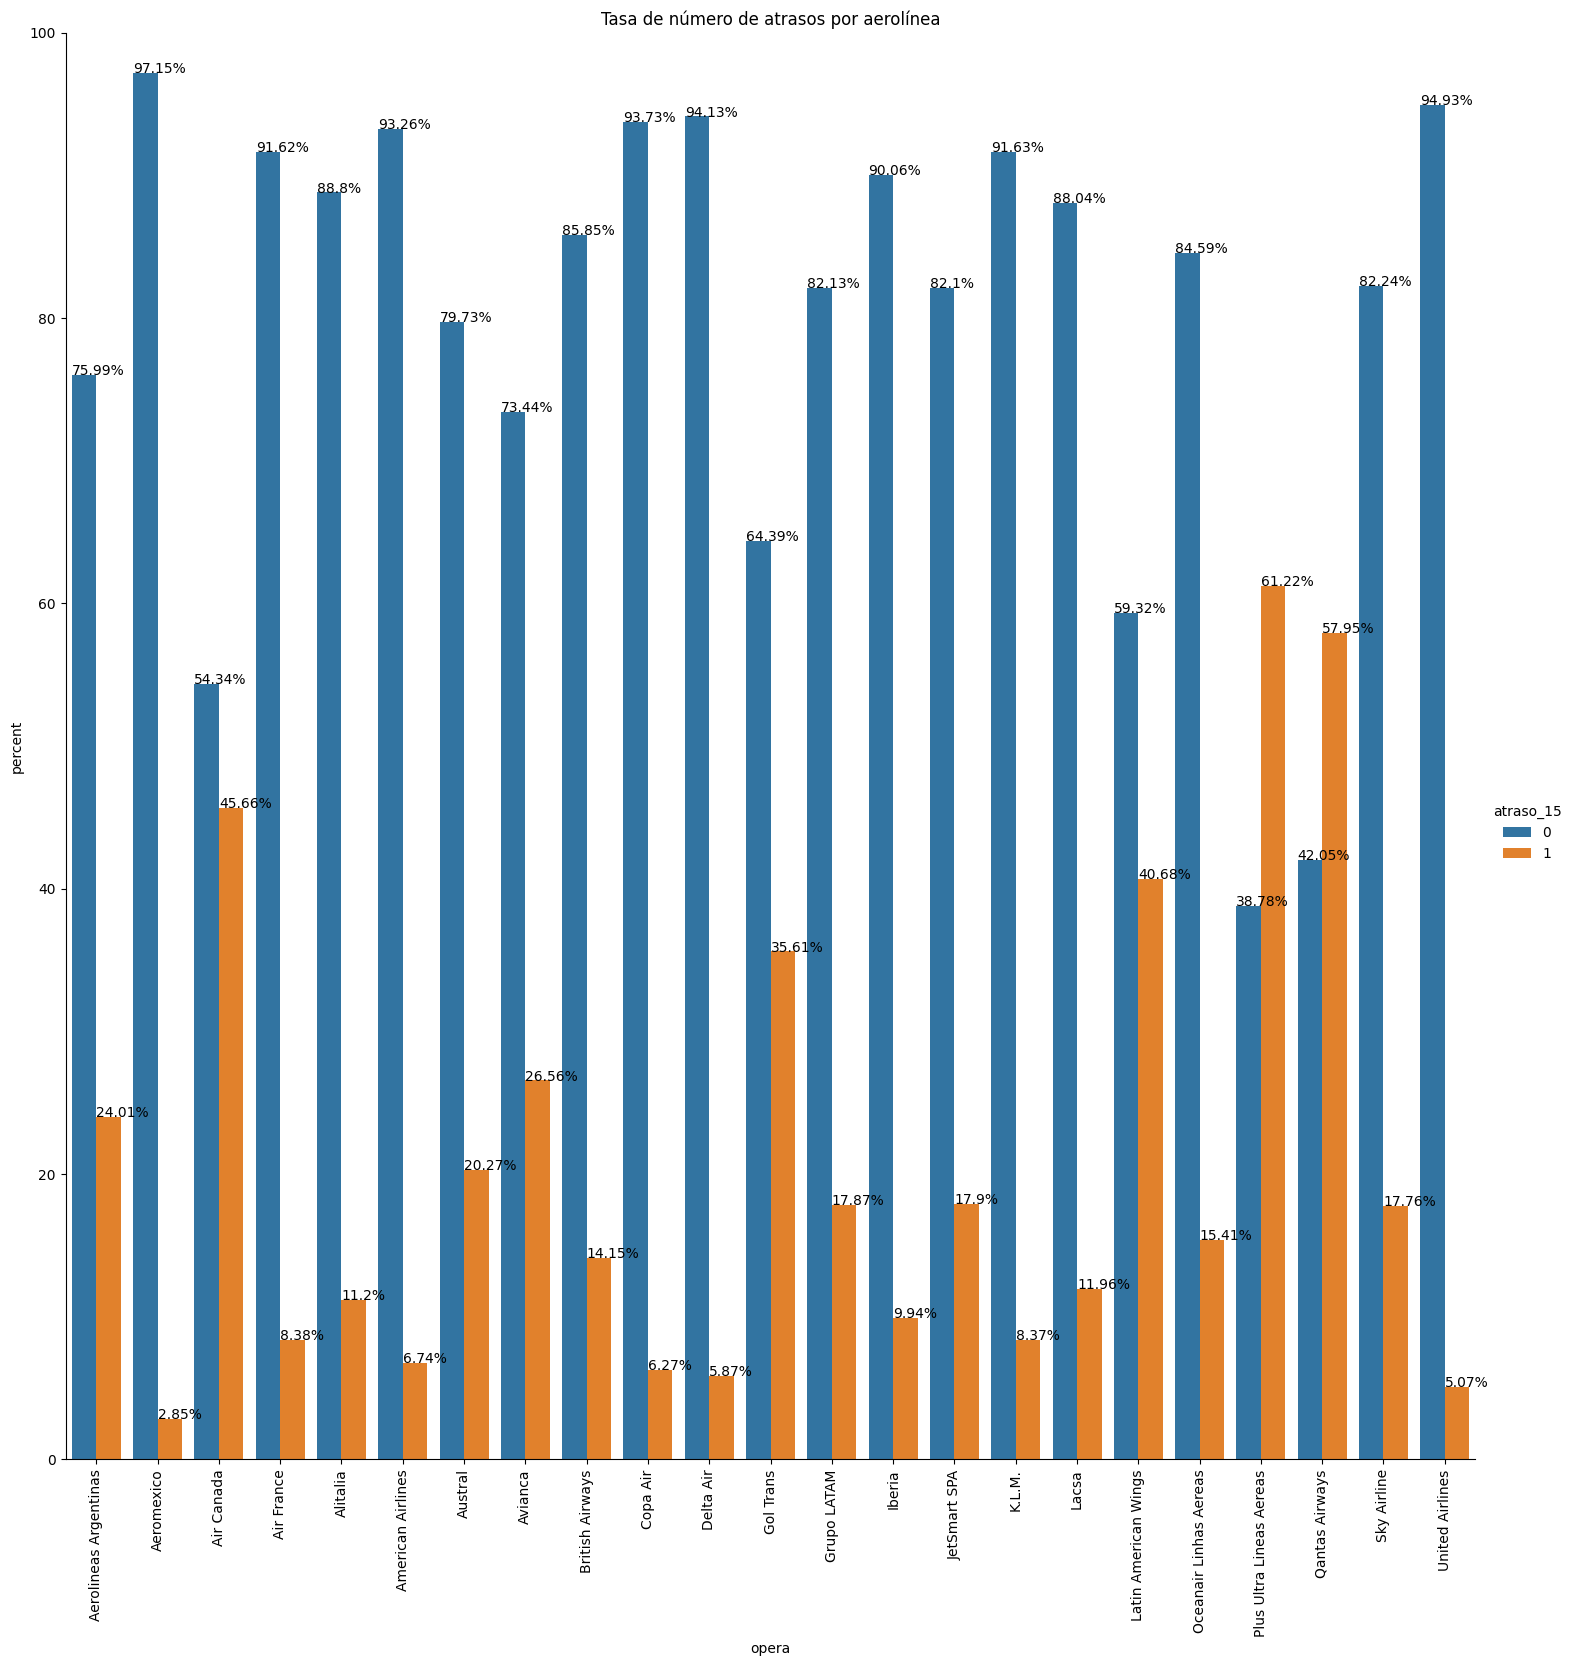

In [64]:
x,y = 'opera','atraso_15'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#plt.figure(figsize = (5,8))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=15, )
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation = 90)
g.set(title ="Tasa de número de atrasos por aerolínea", xlabel='opera') 

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
#.set_title('Número de vuelos atrasados/no atrasados por ciudad destino')

In [65]:
# Tasa de atraso por aerolínea
tasa_atraso_aerolinea = pd.crosstab(df.opera, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_aerolinea[0] = tasa_atraso_aerolinea[0] / tasa_atraso_aerolinea["Total"]
tasa_atraso_aerolinea[1] = tasa_atraso_aerolinea[1] / tasa_atraso_aerolinea["Total"]
print('dataframe:')
print(tasa_atraso_aerolinea)

dataframe:
atraso_15                     opera         0         1  Total
0             Aerolineas Argentinas  0.759877  0.240123   1949
1                        Aeromexico  0.971510  0.028490    351
2                        Air Canada  0.543363  0.456637    565
3                        Air France  0.916201  0.083799    358
4                          Alitalia  0.888031  0.111969    259
5                 American Airlines  0.932629  0.067371    757
6                           Austral  0.797297  0.202703     74
7                           Avianca  0.734375  0.265625   1152
8                   British Airways  0.858537  0.141463    205
9                          Copa Air  0.937297  0.062703   1850
10                        Delta Air  0.941341  0.058659    358
11                        Gol Trans  0.643921  0.356079    806
12                      Grupo LATAM  0.821334  0.178666  40892
13                           Iberia  0.900552  0.099448    362
14                     JetSmart SPA  0.82100

In [66]:
print('*'*46)
print('Estadisticos para tasa de atraso por aerolinea:')
print(tasa_atraso_aerolinea[[0,1]].describe()[1:8])
print('*'*46)
print('Top 1 de tasa de vuelos a tiempo por aerolinea:')
print(tasa_atraso_aerolinea.sort_values(0,ascending = False).head(1))
print('*'*60)
print('Top 1 de tasa de atraso por aerolinea:')
print(tasa_atraso_aerolinea.sort_values(1,ascending = False).head(1))

**********************************************
Estadisticos para tasa de atraso por aerolinea:
atraso_15         0         1
mean       0.795752  0.204248
std        0.164061  0.164061
min        0.387755  0.028490
25%        0.753501  0.083765
50%        0.834115  0.165885
75%        0.916235  0.246499
max        0.971510  0.612245
**********************************************
Top 1 de tasa de vuelos a tiempo por aerolinea:
atraso_15       opera        0        1  Total
1          Aeromexico  0.97151  0.02849    351
************************************************************
Top 1 de tasa de atraso por aerolinea:
atraso_15                     opera         0         1  Total
19         Plus Ultra Lineas Aereas  0.387755  0.612245     49


##### Comentario para tasa de atraso por aerolínea:
* Se observa que la media de los vuelos no atrasados por aerolínea es de 79.57%, mientras que la media de los vuelos atrasados por aerolínea es de 20.42%.

##### Máximos
* Cuando atraso_15 = 0, el destino Aeromexico alcanza una tasa de vuelos a tiempo de 97.15%, y una tasa de atraso de ta solo 2.84%
* Cuando atraso_15 = 1, el destino Plus Ultra Lineas Aereas presenta una tasa de vuelos en tiempo de 38.77% y tasa de atraso maxima de 61.22% 

Tasa de número de atrasos por mes del año

<Figure size 1000x2000 with 0 Axes>

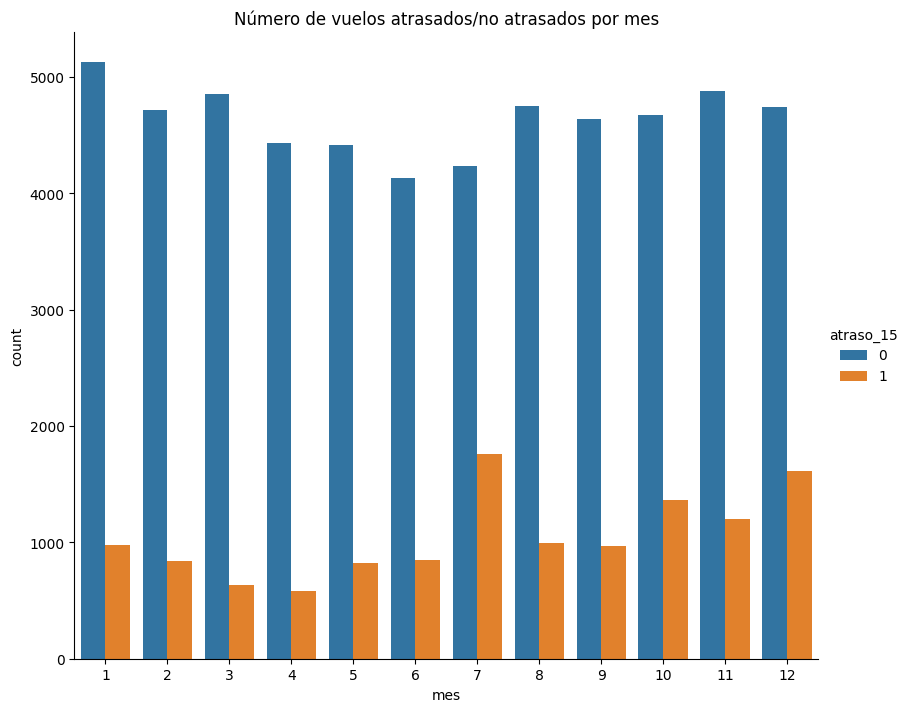

In [67]:
# Número de vuelos atrasados/no atrasados por mes
plt.figure(figsize=(10,20))
g=sns.catplot(x="mes", hue="atraso_15" ,data=df, kind="count",height=7, aspect=1.2)
g.set(title ="Número de vuelos atrasados/no atrasados por mes", xlabel='mes') 
plt.show()

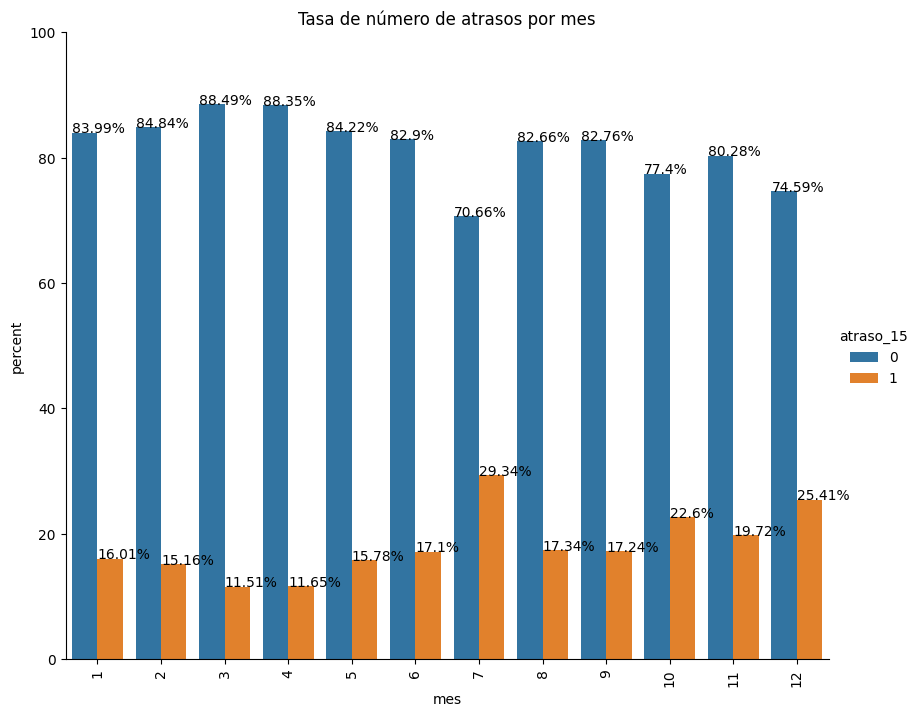

In [68]:
x,y = 'mes','atraso_15'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#plt.figure(figsize = (5,8))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=7, aspect=1.2)
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation = 90)
g.set(title ="Tasa de número de atrasos por mes", xlabel='mes') 

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [69]:
# Tasa de atraso por mes
tasa_atraso_mes = pd.crosstab(df.mes, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_mes[0] = tasa_atraso_mes[0] / tasa_atraso_mes["Total"]
tasa_atraso_mes[1] = tasa_atraso_mes[1] / tasa_atraso_mes["Total"]
print('dataframe:')
print(tasa_atraso_mes)

dataframe:
atraso_15    mes         0         1  Total
0              1  0.839882  0.160118   6108
1              2  0.848409  0.151591   5561
2              3  0.884896  0.115104   5482
3              4  0.883466  0.116534   5020
4              5  0.842176  0.157824   5240
5              6  0.828950  0.171050   4981
6              7  0.706609  0.293391   5992
7              8  0.826602  0.173398   5744
8              9  0.827629  0.172371   5610
9             10  0.774038  0.225962   6032
10            11  0.802796  0.197204   6080
11            12  0.745909  0.254091   6356
12         Total  0.815060  0.184940  68206


In [70]:
print('*'*46)
print('Estadisticos para tasa de atraso por mes:')
print(tasa_atraso_mes[[0,1]].describe()[1:8])
print('*'*46)
print('Top 1 de tasa de vuelos a tiempo por mes:')
print(tasa_atraso_mes.sort_values(0,ascending = False).head(1))
print('*'*60)
print('Top 1 de tasa de atraso por mes:')
print(tasa_atraso_mes.sort_values(1,ascending = False).head(1))

**********************************************
Estadisticos para tasa de atraso por mes:
atraso_15         0         1
mean       0.817417  0.182583
std        0.050669  0.050669
min        0.706609  0.115104
25%        0.802796  0.157824
50%        0.827629  0.172371
75%        0.842176  0.197204
max        0.884896  0.293391
**********************************************
Top 1 de tasa de vuelos a tiempo por mes:
atraso_15 mes         0         1  Total
2           3  0.884896  0.115104   5482
************************************************************
Top 1 de tasa de atraso por mes:
atraso_15 mes         0         1  Total
6           7  0.706609  0.293391   5992


##### Comentario para tasa de atraso por mes:
* Se observa que la media de los vuelos no atrasados por mes es de 81.74%, mientras que la media de los vuelos atrasados por mes es de 18.25%.
* El mayor número de atrasos se da en el mes de julio, seguido en el mes de diciembre. 
* Mientras que el menor número de vuelos atrasados se dan en el mes de marzo.

##### Máximos
* Cuando atraso_15 = 0, el mes de marzo llegó una tasa de vuelos a tiempo de 88.48% y a una tasa de atraso de 11.51%
* Cuando atraso_15 = 1, el mes de julio presenta una tasa de vuelos en tiempo de 70.66% y tasa de atraso maxima de 29.33% 

Tasa de número de atrasos por dia de la semana

<Figure size 1000x2000 with 0 Axes>

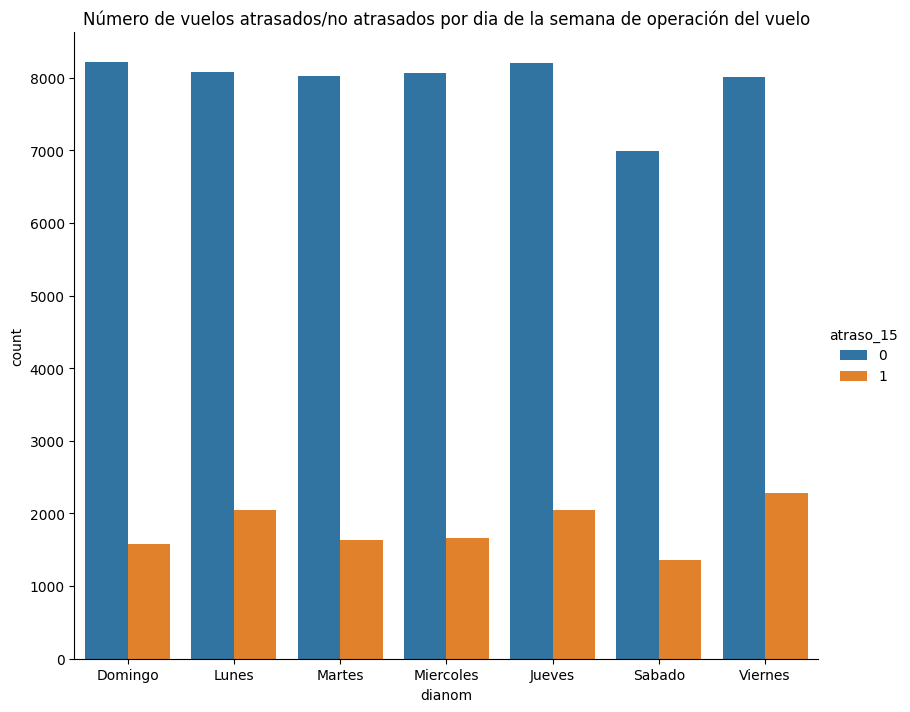

In [71]:
# Número de vuelos atrasados/no atrasados por dia de la semana de operación del vuelo
plt.figure(figsize=(10,20))
g=sns.catplot(x="dianom", hue="atraso_15" ,data=df, kind="count",height=7, aspect=1.2)
g.set(title ="Número de vuelos atrasados/no atrasados por dia de la semana de operación del vuelo", xlabel='dianom') 
plt.show()

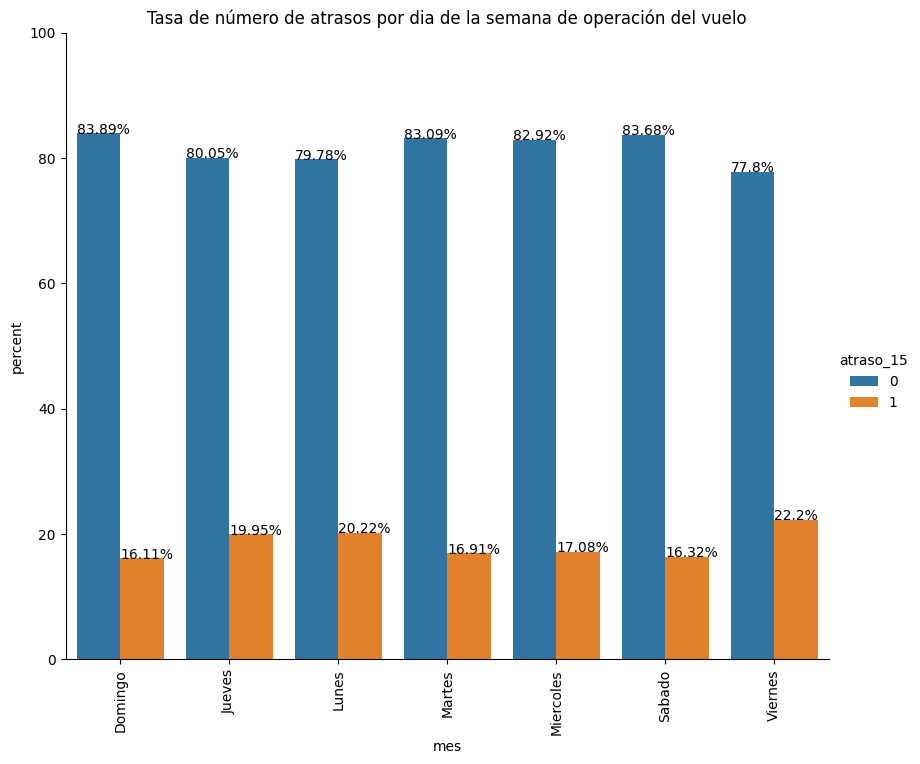

In [72]:
x,y = 'dianom','atraso_15'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#plt.figure(figsize = (5,8))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=7, aspect=1.2)
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation = 90)
g.set(title ="Tasa de número de atrasos por dia de la semana de operación del vuelo", xlabel='mes') 

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [73]:
# Tasa de atraso por dianom
tasa_atraso_dianom = pd.crosstab(df.dianom, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_dianom[0] = tasa_atraso_dianom[0] / tasa_atraso_dianom["Total"]
tasa_atraso_dianom[1] = tasa_atraso_dianom[1] / tasa_atraso_dianom["Total"]
print('dataframe:')
print(tasa_atraso_dianom)

dataframe:
atraso_15     dianom         0         1  Total
0            Domingo  0.838914  0.161086   9796
1             Jueves  0.800507  0.199493  10251
2              Lunes  0.797848  0.202152  10131
3             Martes  0.830884  0.169116   9662
4          Miercoles  0.829150  0.170850   9722
5             Sabado  0.836806  0.163194   8352
6            Viernes  0.777983  0.222017  10292
7              Total  0.815060  0.184940  68206


In [74]:
print('*'*46)
print('Estadisticos para tasa de atraso por dia de la semana de operación del vuelo:')
print(tasa_atraso_dianom[[0,1]].describe()[1:8])
print('*'*46)
print('Top 1 de tasa de vuelos a tiempo por dia de la semana de operación del vuelo:')
print(tasa_atraso_dianom.sort_values(0,ascending = False).head(1))
print('*'*60)
print('Top 1 de tasa de atraso por dia de la semana de operación del vuelo:')
print(tasa_atraso_dianom.sort_values(1,ascending = False).head(1))

**********************************************
Estadisticos para tasa de atraso por dia de la semana de operación del vuelo:
atraso_15         0         1
mean       0.815894  0.184106
std        0.021935  0.021935
min        0.777983  0.161086
25%        0.799842  0.167636
50%        0.822105  0.177895
75%        0.832364  0.200158
max        0.838914  0.222017
**********************************************
Top 1 de tasa de vuelos a tiempo por dia de la semana de operación del vuelo:
atraso_15   dianom         0         1  Total
0          Domingo  0.838914  0.161086   9796
************************************************************
Top 1 de tasa de atraso por dia de la semana de operación del vuelo:
atraso_15   dianom         0         1  Total
6          Viernes  0.777983  0.222017  10292


##### Comentario para tasa de atraso por dia de la semana de operación del vuelo:
* Se observa que la media de los vuelos no atrasados es de 81.58%, mientras que la media de los vuelos atrasados es de 18.41%.

##### Máximos
* Cuando atraso_15 = 0, en los días domingo se llega a la tasa de vuelos a tiempo más alta con 83.89%, así como una tasa de atraso de 16.10%
* Cuando atraso_15 = 1, en los días viernes se observa una tasa de vuelos en tiempo de 77.79% y tasa de atraso maxima de 22.20% 

Tasa de atraso por temporada

<Figure size 1000x2000 with 0 Axes>

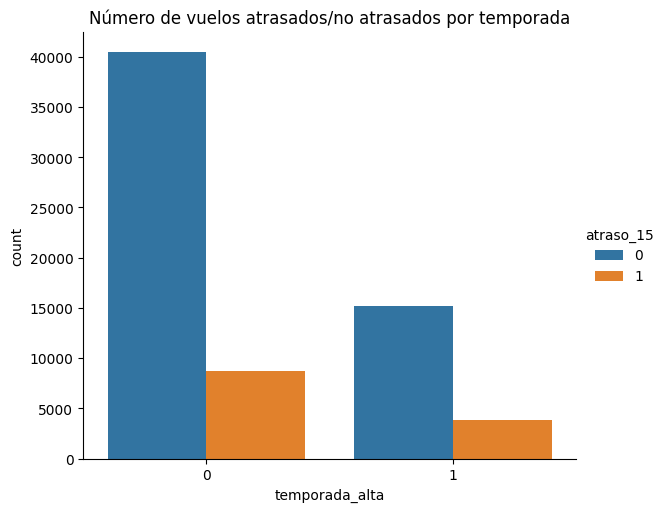

In [75]:
# Número de vuelos atrasados/no atrasados por temporada
plt.figure(figsize=(10,20))
g=sns.catplot(x="temporada_alta", hue="atraso_15" ,data=df, kind="count",height=5, aspect=1.2)
g.set(title ="Número de vuelos atrasados/no atrasados por temporada", xlabel='temporada_alta') 
plt.show()

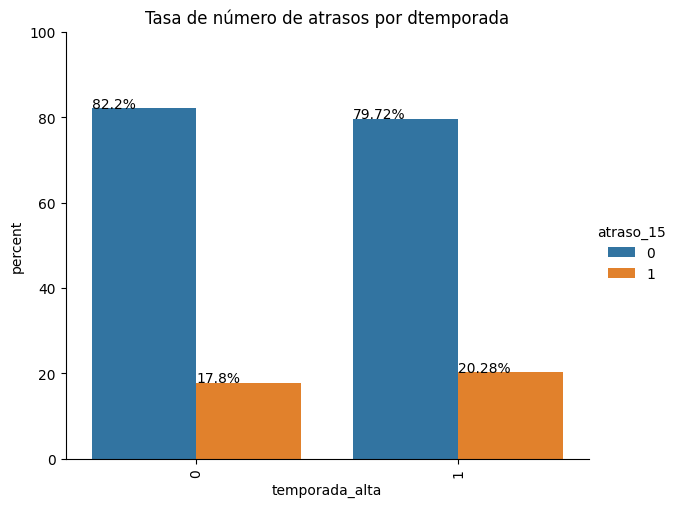

In [76]:
x,y = 'temporada_alta','atraso_15'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#plt.figure(figsize = (5,8))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=5, aspect=1.2)
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation = 90)
g.set(title ="Tasa de número de atrasos por dtemporada", xlabel='temporada_alta') 

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [77]:
# Tasa de atraso por temporada
tasa_atraso_temporada = pd.crosstab(df.temporada_alta, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_temporada[0] = tasa_atraso_temporada[0] / tasa_atraso_temporada["Total"]
tasa_atraso_temporada[1] = tasa_atraso_temporada[1] / tasa_atraso_temporada["Total"]
print('dataframe:')
print(tasa_atraso_temporada)


dataframe:
atraso_15 temporada_alta         0         1  Total
0                      0  0.821975  0.178025  49201
1                      1  0.797159  0.202841  19005
2                  Total  0.815060  0.184940  68206


In [78]:
print('*'*46)
print('Estadisticos para tasa de atraso por temporada:')
print(tasa_atraso_temporada[[0,1]].describe()[1:8])
print('*'*46)
print('Top 1 de tasa de vuelos a tiempo por temporada:')
print(tasa_atraso_temporada.sort_values(0,ascending = False).head(1))
print('*'*60)
print('Top 1 de tasa de atraso por temporada:')
print(tasa_atraso_temporada.sort_values(1,ascending = False).head(1))

**********************************************
Estadisticos para tasa de atraso por temporada:
atraso_15         0         1
mean       0.811398  0.188602
std        0.012807  0.012807
min        0.797159  0.178025
25%        0.806109  0.181482
50%        0.815060  0.184940
75%        0.818518  0.193891
max        0.821975  0.202841
**********************************************
Top 1 de tasa de vuelos a tiempo por temporada:
atraso_15 temporada_alta         0         1  Total
0                      0  0.821975  0.178025  49201
************************************************************
Top 1 de tasa de atraso por temporada:
atraso_15 temporada_alta         0         1  Total
1                      1  0.797159  0.202841  19005


##### Comentario para tasa de atraso por temporada:
* Se observa que la media de los vuelos no atrasados es de 81.13%, mientras que la media de los vuelos atrasados es de 18.86%.

##### Máximos
* Cuando atraso_15 = 0, en la temporada baja se llega a la tasa de vuelos a tiempo más alta con 82.19%, así como una tasa de atraso de 17.80%
* Cuando atraso_15 = 1, en la temporada alta se llega a una tasa de vuelos en tiempo de 79.20% y a una tasa de atraso maxima de 20.28% 
* Por lo tanto, existen una mayor tasa de atrasos en la temporada alta, aunque existan menor cantidad de vuelos en esta temporada.

Tasa de atraso por tipo de vuelo

<Figure size 1000x2000 with 0 Axes>

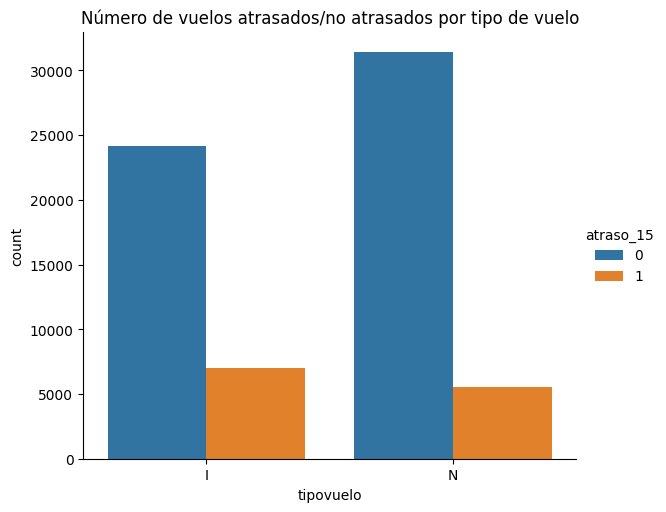

In [79]:
# Número de vuelos atrasados/no atrasados por tipo de vuelo
plt.figure(figsize=(10,20))
g=sns.catplot(x="tipovuelo", hue="atraso_15" ,data=df, kind="count",height=5, aspect=1.2)
g.set(title ="Número de vuelos atrasados/no atrasados por tipo de vuelo", xlabel='tipovuelo') 
plt.show()

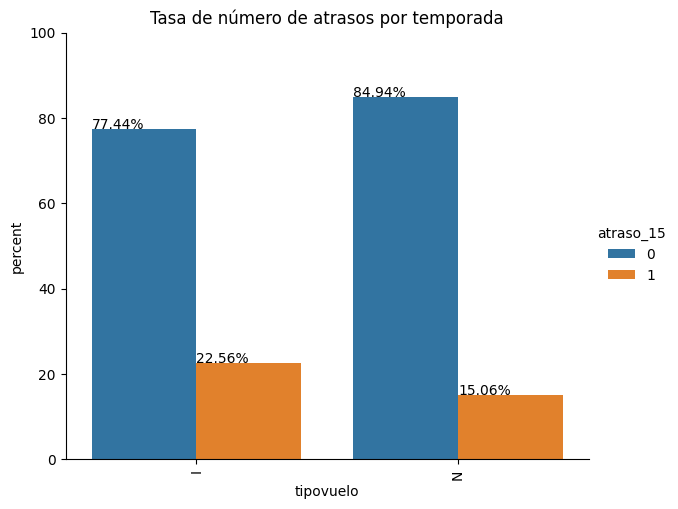

In [80]:
x,y = 'tipovuelo','atraso_15'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#plt.figure(figsize = (5,8))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=5, aspect=1.2)
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation = 90)
g.set(title ="Tasa de número de atrasos por temporada", xlabel='tipovuelo') 

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [81]:
# Tasa de atraso por tipovuelo
tasa_atraso_tipovuelo = pd.crosstab(df.tipovuelo, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_tipovuelo[0] = tasa_atraso_tipovuelo[0] / tasa_atraso_tipovuelo["Total"]
tasa_atraso_tipovuelo[1] = tasa_atraso_tipovuelo[1] / tasa_atraso_tipovuelo["Total"]
print('dataframe:')
print(tasa_atraso_tipovuelo)

dataframe:
atraso_15 tipovuelo         0         1  Total
0                 I  0.774392  0.225608  31240
1                 N  0.849429  0.150571  36966
2             Total  0.815060  0.184940  68206


In [82]:
print('*'*46)
print('Estadisticos para tasa de atraso por tipovuelo:')
print(tasa_atraso_tipovuelo[[0,1]].describe()[1:8])
print('*'*46)
print('Top 1 de tasa de vuelos a tiempo por tipovuelo:')
print(tasa_atraso_tipovuelo.sort_values(0,ascending = False).head(1))
print('*'*60)
print('Top 1 de tasa de atraso por tipovuelo:')
print(tasa_atraso_tipovuelo.sort_values(1,ascending = False).head(1))

**********************************************
Estadisticos para tasa de atraso por tipovuelo:
atraso_15         0         1
mean       0.812960  0.187040
std        0.037563  0.037563
min        0.774392  0.150571
25%        0.794726  0.167755
50%        0.815060  0.184940
75%        0.832245  0.205274
max        0.849429  0.225608
**********************************************
Top 1 de tasa de vuelos a tiempo por tipovuelo:
atraso_15 tipovuelo         0         1  Total
1                 N  0.849429  0.150571  36966
************************************************************
Top 1 de tasa de atraso por tipovuelo:
atraso_15 tipovuelo         0         1  Total
0                 I  0.774392  0.225608  31240


##### Comentario para tasa de atraso por tipo de vuelo:
* Se observa que la media de los vuelos no atrasados es de 81.29%, mientras que la media de los vuelos atrasados es de 18.70%.

##### Máximos
* Cuando atraso_15 = 0, el tipo de vuelo Nacional (N) presenta la tasa de vuelos a tiempo más alta con 84.94%, así como una tasa de atraso de 15.05%
* Cuando atraso_15 = 1, el tipo de vuelo Internacional (I) presenta una tasa de vuelos en tiempo de 77.43% y la tasa de atraso maxima de 22.56% 

##################################################################################################################################
##################################################################################################################################

#### 3. ¿Qué variables esperarías que más influyeran en predecir atrasos?

* Para determinar cuales de estas variables independientes están mayormente relacionadas con el atraso, propongo hacer un análisis de chi-cuadrado, ya que se trata de variables independientes categóricas. Recordemos que la prueba de chi-cuadrado es un procedimiento estadístico utilizado para determinar si existe una diferencia significativa entre los resultados esperados y los observados en una o más categorías. La idea básica de la prueba es que se comparan los valores de los datos reales con lo que se esperaría si la hipótesis nula fuera cierta.
*  Para los modelos de ML se tomarán la variable independiente del número de vuelo programado (vlo_i).
* Es importante señalar que la variable "dif_min" (que es continua), no la podemos utilizar para realizar los modelos de ML, ya que ésta nos ayudó a construir la variable independiente atrasos. Dicho de otra forma, la variable "dif_min" utiliza a la variable Fecha-O (fecha y hora de operación del vuelo), pero justamete queremos identificar lo vuelos que serán atrasos.


In [83]:
# Encode variables
new_df_chi_q = df[['atraso_15','vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
new_df_chi_q = pd.get_dummies(new_df_chi_q, columns=['vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)
print(len(new_df_chi_q.columns))
new_df_chi_q.columns

715


Index(['atraso_15', 'vlo_i_10', 'vlo_i_100', 'vlo_i_1003', 'vlo_i_1004',
       'vlo_i_1005', 'vlo_i_1011', 'vlo_i_102', 'vlo_i_1025', 'vlo_i_1031',
       ...
       'siglades_Sydney', 'siglades_Temuco', 'siglades_Toronto',
       'siglades_Tucuman', 'siglades_Ushuia', 'siglades_Valdivia',
       'siglades_Washington', 'temporada_alta_1', 'periodo_dia_noche',
       'periodo_dia_tarde'],
      dtype='object', length=715)

In [84]:
## Analicemos la Varianza
varianza = new_df_chi_q.std()/new_df_chi_q.mean()
varianza.sort_values(ascending = False).head()

vlo_i_1363    261.162784
vlo_i_1320    261.162784
vlo_i_1269    261.162784
vlo_i_1271    261.162784
vlo_i_9600    261.162784
dtype: float64

In [85]:
varianza = new_df_chi_q.std()/new_df_chi_q.mean()
varianza.sort_values(ascending = False).tail()

periodo_dia_noche    1.712214
temporada_alta_1     1.609001
periodo_dia_tarde    1.293886
tipovuelo_N          0.919300
opera_Grupo LATAM    0.817291
dtype: float64

* Existen variazas muy altas, cobre todo en las categorias de vuelos programados
* La variable con menor varianza es opera_Grupo .

In [86]:
# En cualquier proyecto, es necesario hacer el análisis de las correlaciones entre variables continuas, sin embargo, para este proecto 
# #no se debe utilizar la variable "dif_min" para entrenar los modelos de ML, ya que es la variable que se utilizó para construir el atraso_15. 
# df[['var_continua_1','var_continua_2',"etc"]].corr()

In [87]:
# Importemos chi2 de sklearn
from sklearn.feature_selection import chi2

# La idea básica de la prueba de chi-cuadrado esuna prueba de hipótesis común basado en la distribución.
# Hipótesis H0: No hay diferencia entre la frecuencia observada y la frecuencia esperada, o bien, p value > 0.05,

catv = [c for c in new_df_chi_q.columns if ('vlo_i' in c)|('dia' in c)|('mes' in c)|('dianom' in c)|('tipovuelo' in c)|('opera' in c)|
                                           ('siglades' in c)|('temporada_alta' in c)|('periodo_dia' in c)]

X = new_df_chi_q[catv]
y = new_df_chi_q['atraso_15']

chi_sq, p_val = chi2(X,y)
chi_values = pd.DataFrame.from_dict({'variable':X.columns,
                        'chi_sq':chi_sq, 'p_value':p_val})
print(len(chi_values.variable.values))
chi_values.sort_values(ascending=True, by='p_value').round(3)

714


,variable,chi_sq,p_value
644,opera_Latin American Wings,546.681,0.000
459,vlo_i_7663,508.878,0.000
615,mes_7,467.544,0.000
525,vlo_i_92,323.357,0.000
627,tipovuelo_N,289.678,0.000
...,...,...,...
92,vlo_i_1226,0.001,0.970
91,vlo_i_1224,0.001,0.970
409,vlo_i_582,0.001,0.974
542,vlo_i_942,0.001,0.976


In [88]:
# Analisis de las categorías más relevantes para la predicción según la prueba de chi-cuadrada
chi_values_t2 = chi_values[(chi_values['p_value'] <= 0.05 )].sort_values(['p_value'],ascending = True).round(4)
print(len(chi_values_t2.variable.values))
#chi_values_t2.to_csv('chi_values_t2.csv', sep=',', encoding='utf-8')
chi_values_t2

318


,variable,chi_sq,p_value
644,opera_Latin American Wings,546.6808,0.0000
459,vlo_i_7663,508.8780,0.0000
615,mes_7,467.5441,0.0000
525,vlo_i_92,323.3572,0.0000
627,tipovuelo_N,289.6776,0.0000
...,...,...,...
193,vlo_i_192,3.9533,0.0468
33,vlo_i_1104,3.9511,0.0468
73,vlo_i_1170,3.9511,0.0468
262,vlo_i_267,3.8969,0.0484


Se observa que el mayor valor del estadistico de prueba chi_sq lo obtiene  la variable categorica opera_Latin American Wings, que es una de las categorias de la variable opera (nombre de aerolínea que opera). Al analizar de cerca la tasa de atraso por la variable opera, se aprecia que es la que presenta un mayor número de casos (1674) y la que en proporción de vuelos atrasados alcanza 40.68%, esto quiere decir que ésta categoría, tiene mayor relación con la variable objetivo aqui analizada.

In [89]:
# Analisis de las categorias más relevantes para la predicción según la prueba de chi-cuadrada
# Tasa de atraso por nombre de aerolínea que opera
tasa_atraso_opera= pd.crosstab(df.opera, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_opera[0] = tasa_atraso_opera[0] / tasa_atraso_opera["Total"]
tasa_atraso_opera[1] = tasa_atraso_opera[1] / tasa_atraso_opera["Total"]
print('dataframe:')
print(tasa_atraso_opera.sort_values(1,ascending = False))
#print('*'*46)
#print('*'*46)
#print('describe tasa_atraso_opera:')
#print(tasa_atraso_opera[[0,1]].describe()[1:8])
#print(tasa_atraso_opera.sort_values(0,ascending = False).head(1))
#print('*'*60)
#print(tasa_atraso_opera.sort_values(1,ascending = False).head(1))

dataframe:
atraso_15                     opera         0         1  Total
19         Plus Ultra Lineas Aereas  0.387755  0.612245     49
20                   Qantas Airways  0.420513  0.579487    195
2                        Air Canada  0.543363  0.456637    565
17             Latin American Wings  0.593190  0.406810   1674
11                        Gol Trans  0.643921  0.356079    806
7                           Avianca  0.734375  0.265625   1152
0             Aerolineas Argentinas  0.759877  0.240123   1949
6                           Austral  0.797297  0.202703     74
23                            Total  0.815060  0.184940  68206
14                     JetSmart SPA  0.821005  0.178995   1095
12                      Grupo LATAM  0.821334  0.178666  40892
21                      Sky Airline  0.822353  0.177647  14298
18           Oceanair Linhas Aereas  0.845878  0.154122    279
8                   British Airways  0.858537  0.141463    205
16                            Lacsa  0.88043

In [90]:
# Analisis de las categorias que no son relevantes para la predicción según la prueba de chi-cuadrada
chi_values_t3 = chi_values[(chi_values['p_value'] > 0.05 )].sort_values(['p_value'],ascending = False).round(4)
print(len(chi_values_t3.variable.values))
#chi_values_t3.to_csv('chi_values_t3.csv', sep=',', encoding='utf-8')
chi_values_t3

396


,variable,chi_sq,p_value
670,siglades_Florianapolis,0.0001,0.9936
542,vlo_i_942,0.0009,0.9763
409,vlo_i_582,0.0010,0.9744
92,vlo_i_1226,0.0014,0.9699
91,vlo_i_1224,0.0014,0.9699
...,...,...,...
606,dia_28,3.5965,0.0579
451,vlo_i_75,3.6293,0.0568
277,vlo_i_289,3.6623,0.0557
317,vlo_i_352,3.7465,0.0529


Se observa que la categoria con menor valor estadistico de la prueba chi-cuadrada es la categoría "Florianapolis" que pertenece a la variable de nombre de la ciudad de destino (siglades). En general las variables del dataframe chi_values_t3 no deberían ser consideradas para entrar a los modelos de ML pues su p_value es poco significativo según a prueba de chi-cuadrada (aunque nada nos impide que se pueden ejecutar los modelos integrandolas).

In [91]:
key_list = list(df.dianom.unique())
value_list = range(0,len(list(df.dianom.unique())),1)

dianom_dict_from_list = {}
for i in value_list:
  dianom_dict_from_list[key_list[i]] = value_list[i]

In [92]:
key_list = list(df.siglades.unique())
value_list = range(0,len(list(df.siglades.unique())),1)

siglades_dict_from_list = {}
for i in value_list:
  siglades_dict_from_list[key_list[i]] = value_list[i]

In [93]:
key_list = list(df.opera.unique())
value_list = range(0,len(list(df.opera.unique())),1)

opera_dict_from_list = {}
for i in value_list:
  opera_dict_from_list[key_list[i]] = value_list[i]

In [94]:
key_list = list(df.periodo_dia.unique())
value_list = range(0,len(list(df.periodo_dia.unique())),1)

periodo_dia_dict_from_list = {}
for i in value_list:
  periodo_dia_dict_from_list[key_list[i]] = value_list[i]

In [95]:
key_list = list(df.tipovuelo.unique())
value_list = range(0,len(list(df.tipovuelo.unique())),1)

tipovuelo_dict_from_list = {}
for i in value_list:
  tipovuelo_dict_from_list[key_list[i]] = value_list[i]

In [96]:
catv = [c for c in df.columns if ('vlo_i' in c)|('dia' in c)|('mes' in c)|('dianom' in c)|('tipovuelo' in c)|('opera' in c)|('siglades' in c)|('temporada_alta' in c)|('periodo_dia' in c)]
X = df[catv]
y = df['atraso_15']
# Encode categorical columns to numbers
#X.tipovuelo.replace({'I':0,'N':1}, inplace=True)
X.tipovuelo.replace(tipovuelo_dict_from_list, inplace=True)
X.periodo_dia.replace(periodo_dia_dict_from_list, inplace=True)
X.dianom.replace(dianom_dict_from_list, inplace=True)
X.opera.replace(opera_dict_from_list, inplace=True)
X.siglades.replace(siglades_dict_from_list, inplace=True)
X

,vlo_i,dia,mes,dianom,tipovuelo,opera,siglades,temporada_alta,periodo_dia
0,226,1,1,0,0,0,0,1,0
1,226,2,1,1,0,0,0,1,0
2,226,3,1,2,0,0,0,1,0
3,226,4,1,3,0,0,0,1,0
4,226,5,1,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
68201,400,22,12,6,0,20,15,1,1
68202,400,25,12,1,0,20,15,1,1
68203,400,27,12,3,0,20,15,1,1
68204,400,29,12,6,0,20,15,1,1


In [97]:
# Prueba de independencia
chi_sq, p_val = chi2(X,y)
chi_values_all_variables = pd.DataFrame.from_dict({'variable':X.columns,
                        'chi_sq':chi_sq, 'p_value':p_val})
chi_values_all_variables.sort_values(ascending=True, by='p_value').round(5)

,variable,chi_sq,p_value
0,vlo_i,1.329862e+06,0.00000
2,mes,8.895956e+02,0.00000
6,siglades,5.867239e+02,0.00000
4,tipovuelo,2.896776e+02,0.00000
8,periodo_dia,6.930246e+01,0.00000
3,dianom,6.733437e+01,0.00000
7,temporada_alta,4.040475e+01,0.00000
1,dia,2.120830e+00,0.14531
5,opera,2.615600e-01,0.60905


Revisamos cada uno de los valores de p_value obtenido:

* Las variables vlo_o, mes, sglades, tipovuelo, periodo_dia, dianom y temporada_alta presentan un valor p tal que el valor p < 0.05, por lo que rechazamos la hipotesis nula y decimos que hay diferencia significativa entre los atrasos y las vairables antes mencionadas. Dicho de otra forma, existe diferencia entre las categorias de los vuelos atrasados (0,1) y estas variables.

* Las variables día y opera presentan un valor p tal que el valor p > 0.05, por lo que para ambas variables no rechazamos la hipótesis nula y decimos que no hay una diferencia significativa entre atrasos y el dia de operación. así como con el nombre de la arelínea que opera.

Conclusiones Pruebas Chi-Cuadradas

* Por el análisis anterior y para contestar la pregunta "¿qué variables esperarías que más influyeran en predecir atrasos?", yo diria que las variables que más influiran serán: vlo_i, mes, siglades, tipovuelo, periodo_dia, dianom y temporada_alta. Aunque existen categorias de las variables día y opera que presentan una relación significativa con la variable "atrasos_15", por lo que dichas categorías serán incluidas en los modelos de ML.

#### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [98]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_split(X, y,test_size=0.2,random_state=5874,
                        scale_x=True,scale_y=False,
                        cat_variables=[]):

  # Split data
  x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size, 
                                                    random_state=random_state)
  # Scale X
  if scale_x:
    # Find numerical column index
    #num_i = [X.columns.get_loc(c) for c in X.columns if c not in cat_variables]
    cat_i = [X.columns.get_loc(c) for c in X.columns if c in cat_variables]
    # Scale Numerical Variables
    #x_train_ = x_train.iloc[:, num_i]
    #x_test_ = x_test.iloc[:, num_i]
    #scaler = StandardScaler().fit(x_train_)
    #x_train_ = scaler.transform(x_train_)
    #x_test_ = scaler.transform(x_test_)
    # Create new dataframe
    #x_train = np.concatenate([x_train_, x_train.iloc[:,cat_i]], axis=1)
    #x_test = np.concatenate([x_test_, x_test.iloc[:,cat_i]],axis=1)

    # Create new dataframe Categoricas
    x_train = x_train.iloc[:,cat_i]
    x_test = x_test.iloc[:,cat_i]

  # Scale Y
  if scale_y:
    scaler = StandardScaler().fit(y_train)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

  return x_train, x_test, y_train, y_test


In [99]:
# Funcion de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def log_regression(x_train, x_test, y_train, y_test):
  
  #print(x_train.columns)
  # Train Logistic Model
  model_log_reg = LogisticRegression()
  model_log_reg.fit(x_train, y_train)

  #Test the model
  predictions_log_reg = model_log_reg.predict(x_test)

  #Check precision, recall, f1-score
  #print( '', classification_report(y_test, predictions) )
  print( 'Accuracy: ', accuracy_score(y_test, predictions_log_reg))
  #print(' Coefficients: ', model.coef_)
  print('----------------------------------------------------------------')
  return model_log_reg, predictions_log_reg


In [100]:
# Modelo con las variables extraidas de la prueba chi-cuadrada

df_chi_q = df[['atraso_15','vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q = pd.get_dummies(df_chi_q, columns=['vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)

#Variables significativas extraidas de la prueba chi-cuadrada
X = df_chi_q.loc[:,list(chi_values_t2.variable)]
#X = df_chi_q.loc[:, df_chi_q.columns!='atraso_15']
#X = df_chi_q.loc[:,['opera_Latin American Wings','mes_7']]

#Son todas las Variables
#cat_variables = list(df_chi_q.columns[1:df_chi_q.shape[1]-1])

#Variables significativas extraidas de la prueba chi-cuadrada
cat_variables = list(chi_values_t2.variable)

y = df['atraso_15']

x_train, x_test, y_train, y_test = preprocess_split(X, y, #scale_x=True, 
                                                    random_state=2453,
                                                    cat_variables = cat_variables,
                                                    test_size=0.2)
#print('X columns: ',X.columns)
model_log_reg_var_sig, predictions_log_reg_var_sig = log_regression(x_train, x_test, y_train, y_test)

print('Shape dataset X:',X.shape[1])
print('Shape list cat_variables',len(cat_variables))


Accuracy:  0.8204808679079314
----------------------------------------------------------------
Shape dataset X: 318
Shape list cat_variables 318


In [101]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

score_var_sig = accuracy_score(y_test, predictions_log_reg_var_sig)
print("accuracy:   %0.3f" % score_var_sig)
report_var_sig = classification_report(y_test,predictions_log_reg_var_sig)
print(report_var_sig)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(y_test,predictions_log_reg_var_sig)

accuracy:   0.820
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     11144
           1       0.56      0.09      0.15      2498

    accuracy                           0.82     13642
   macro avg       0.70      0.54      0.52     13642
weighted avg       0.78      0.82      0.76     13642

Matriz de confusión
-------------------


array([[10977,   167],
       [ 2282,   216]], dtype=int64)

In [102]:
# Modelo con todas las variables

df_chi_q = df[['atraso_15','vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q = pd.get_dummies(df_chi_q, columns=['vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)

# Todas la variables
X = df_chi_q.loc[:, df_chi_q.columns!='atraso_15']

# Todas la variables
cat_variables = list(df_chi_q.columns[1:df_chi_q.shape[1]])

y = df['atraso_15']

x_train_all_var, x_test_all_var, y_train_all_var, y_test_all_var = preprocess_split(X, y, #scale_x=True, 
                                                    random_state=2453,
                                                    cat_variables = cat_variables,
                                                    test_size=0.2)
#print('X columns: ',X.columns)
model_log_reg_all_var, predictions_log_reg_all_var = log_regression(x_train_all_var, x_test_all_var, y_train_all_var, y_test_all_var)

print('Shape dataset X:',X.shape[1])
print('Shape list cat_variables',len(cat_variables))


Accuracy:  0.8206274739774226
----------------------------------------------------------------
Shape dataset X: 714
Shape list cat_variables 714


In [103]:
score_all_var = accuracy_score(y_test_all_var, predictions_log_reg_all_var)
print("accuracy:   %0.3f" % score_all_var)
report_all_var = classification_report(y_test_all_var,predictions_log_reg_all_var)
print(report_all_var)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(y_test_all_var,predictions_log_reg_all_var)

accuracy:   0.821
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     11144
           1       0.56      0.09      0.16      2498

    accuracy                           0.82     13642
   macro avg       0.70      0.54      0.53     13642
weighted avg       0.78      0.82      0.76     13642

Matriz de confusión
-------------------


array([[10970,   174],
       [ 2273,   225]], dtype=int64)

### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular?

Comentarios sobre los dos modelos:

* Resultados del modelo con variables significativas dada la prueba Chi-cuadrada:

    accuracy:   0.820

                precision    recall  f1-score   support

            0       0.83      0.99      0.90     11144
            1       0.56      0.09      0.15      2498

        accuracy                        0.82     13642

        Matriz de confusión
    
        [ 10977,   167]
        
        [ 2282,    216]

* Resultados del modelo con todas las variables:

accuracy:   0.821

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     11144
           1       0.56      0.09      0.16      2498

        accuracy                       0.82     13642

        Matriz de confusión
        
        [ 10970,   174]
        
        [ 2273,    225]

Cuando comparamos las métricas de desempeño de los modelos, se observan resultados muy similares, por lo que por el principio de parsimonia, que indica que ante dos teorías que explican el mismo fenómeno, la teoría mas simple tiene mayor probabilidad de ser la correcta, me quedaria con el modelo que tiene menos variables.

Concluisones:

Yo elegí el algoritmo de regresión logistica, pues es uno de los mejores para clasificar vairables binarias (0,1), además es rápido y muy eficiente.

Se tiene un modelo desbalanceado, pues el accuracy es 82%, si embargo, el Recall es de  9% para lo atrasos = 1. Esto es de suma importancia, ya que si dejaramos así el modelo, estariamos prediciendo muchos casos como '0' correctamente, pero los '1' los estaríamos prediciendo sumamente mal. Por lo anterior, existen dos posibilidades:

* Caso 1: Predecir un vuelo como "No Atraso", pero que si lo fue (Falsos Negativos o FN).

* Caso 2: Predecir un vuelo como Atraso, pero que no lo fue (Falsos Psotivos o FP). 

Por lo anterior, considero que es peor predecir un vuelo como No Atraso, pero que si lo fue. Por lo que se debe minimizar los FN (Recall).

### Presicion-Recall curve

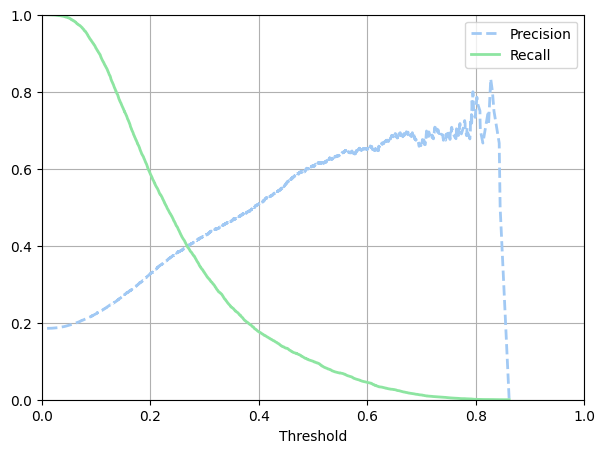

In [104]:
from sklearn.metrics import precision_recall_curve
# Getting prediction probabilities
y_scores = model_log_reg_var_sig.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores, pos_label=1)

def plot_precision_recall_vs_threshold(precision, recall, threshold):    
    plt.plot(threshold, precision[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(threshold, recall[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.legend()

plt.figure(figsize=(7, 5))
plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()


Se observa un comportamiento muy malo de nuestro modelo, ya que tenemos muchos casos como FN. Vale la pena tratar de modificar el umbral para que el modelo alcance a mejorar la predicción.

In [105]:
prediction_labels = model_log_reg_var_sig.predict(x_test)
prediction_scores = model_log_reg_var_sig.predict_proba(x_test)

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test.values, prediction_scores[:,1], pos_label=1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values, prediction_scores[:,1], pos_label=1)

ROC-AUC score

In [107]:
accuracy_score(y_test, prediction_labels)

0.8204808679079314

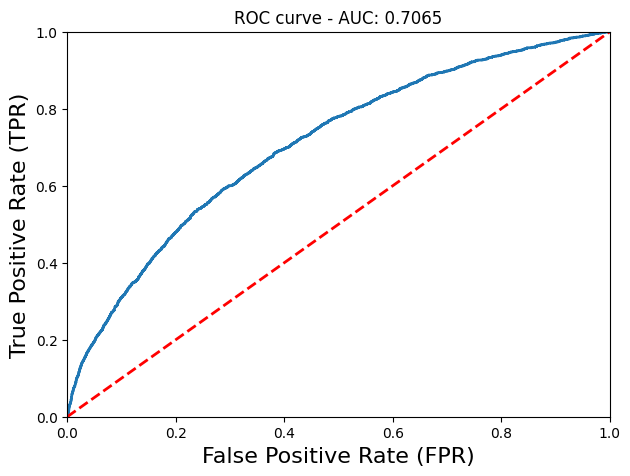

In [108]:
# Plotting the true positive and false positive rate
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', c="red", linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.title("ROC curve - AUC: " + str(roc_auc_score(y_test, prediction_scores[:,1]).round(4)))

plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

Se alcanzó un 70.65% de área bajo la curva de ROC.

### 5. ¿Cómo podrías mejorar la performance?

Supongamos que necesitamos mejorar el modelo que se realizó, entonces, debemos encontrar un punto de corte óptimo para que no tengamos más de "x%" de Falsos Negativos (FN) consiguiendo el mayor número de verdaderos positivos.

In [120]:
df_metrics = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
df_metrics[df_metrics.fpr <= 0.10].sort_values(by="fpr", ascending=False).head(10)

,fpr,tpr,thresholds
971,0.099874,0.309448,0.299316
970,0.099874,0.308647,0.299356
969,0.099785,0.308647,0.299360
968,0.099605,0.308647,0.299431
967,0.099336,0.308647,0.299608
966,0.099336,0.308247,0.299627
965,0.099156,0.308247,0.299694
964,0.099156,0.307846,0.299708
963,0.098798,0.307846,0.299865
962,0.098798,0.307446,0.300129


Aqui se puede modificar el valor del umbral para fpr y tratar de mejorar el Recall.

In [121]:
#punto_corte = df_metrics[df_metrics.fpr < 0.05].sort_values(by=["fpr", "tpr"], ascending=False).head(1)
punto_corte = df_metrics[df_metrics.fpr < 0.1].sort_values(by=["fpr", "tpr"], ascending=False).head(1)
#punto_corte = df_metrics[df_metrics.fpr < 0.2].sort_values(by=["fpr", "tpr"], ascending=False).head(1)
#punto_corte = df_metrics[df_metrics.fpr < 0.3].sort_values(by=["fpr", "tpr"], ascending=False).head(1)
#punto_corte = df_metrics[df_metrics.fpr < 0.5].sort_values(by=["fpr", "tpr"], ascending=False).head(1)
punto_corte

,fpr,tpr,thresholds
971,0.099874,0.309448,0.299316


In [122]:
precision, recall, threshold = precision_recall_curve(y_test, prediction_scores[:,1], pos_label=1)

thresholds_ = np.append(threshold, 1)
precision_recall = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': thresholds_})
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})

metrics = tpr_fpr.merge(precision_recall, how="inner", on="thresholds")
metrics
#metrics[metrics.fpr <= 0.01]


,tpr,fpr,thresholds,precision,recall
0,0.000400,0.000090,0.840414,0.500000,0.000400
1,0.001201,0.000090,0.827683,0.750000,0.001201
2,0.002002,0.000090,0.809952,0.833333,0.002002
3,0.002002,0.000269,0.793853,0.625000,0.002002
4,0.002402,0.000269,0.792574,0.666667,0.002402
...,...,...,...,...,...
5109,0.999600,0.998475,0.017559,0.183280,0.999600
5110,1.000000,0.998475,0.017004,0.183339,1.000000
5111,1.000000,0.998654,0.016984,0.183313,1.000000
5112,1.000000,0.998833,0.016321,0.183286,1.000000


A partir del punto de corte se genera la matriz de confusión asociada. Aquellos valores que sean iguales o superiores al punto de corte seleccionado se etiquetarán como etiqueta positiva.

In [123]:
print(punto_corte.thresholds.values[0])
print(punto_corte)

0.2993164686641932
          fpr       tpr  thresholds
971  0.099874  0.309448    0.299316


In [124]:
labels_punto_corte = [1 if prediction >= punto_corte.thresholds.values[0] else 0
                      for prediction in prediction_scores[:,1]]

Reference

sklearn.metrics.confusion_matrix

Thus in binary classification, the count of true negatives is C00, false negatives is C10, true positives is C11 and false positives is C01.

Recall = TP / (TP + FN) = TP / P = TPR Precision = TP / (TP + FP) = TP / PP

In [125]:
confusion_matrix(y_test, labels_punto_corte)

array([[10031,  1113],
       [ 1725,   773]], dtype=int64)

Confusion Matrix 1122 = TN (C0,0), 10022 = FP (C0,1) 69 = FN (C1,0), 2429 = TP (C1,1)

In [126]:
tn, fp, fn, tp = confusion_matrix(y_test, labels_punto_corte).ravel()
(tn, fp, fn, tp)


(10031, 1113, 1725, 773)

Nuevo modelo de regresión logistica con el punto de corte establecido mi

In [127]:
punto_corte.thresholds.values[0]

0.2993164686641932

In [128]:
threshold_new = punto_corte.thresholds.values[0]

y_pred = (model_log_reg_var_sig.predict_proba(x_test)[:, 1] > threshold_new).astype('float')
confusion_matrix(y_test, y_pred)

array([[10031,  1113],
       [ 1726,   772]], dtype=int64)

In [129]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

score_new = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score_new)
report_new = classification_report(y_test,y_pred)
print(report_new)

accuracy:   0.792
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     11144
           1       0.41      0.31      0.35      2498

    accuracy                           0.79     13642
   macro avg       0.63      0.60      0.61     13642
weighted avg       0.77      0.79      0.78     13642



Se ejecutaron varios modelos con distintos umbrables de fpr, es decir, se probaron los siguientes umbrales:

* (df_metrics.fpr < 0.05) -> Recall (1) = 0.20, disminución de los FN en 12.01%
* (df_metrics.fpr < 0.10) -> Recall (1) = 0.31, disminución de los FN en 24.36%
* (df_metrics.fpr < 0.20) -> Recall (1) = 0.48, disminución de los FN en 42.94%
* (df_metrics.fpr < 0.30) -> Recall (1) = 0.60, disminución de los FN en 56.22%
* (df_metrics.fpr < 0.50) -> Recall (1) = 0.78, disminución de los FN en 75.85%

Considero que dejar el umbral de "df_metrics.fpr < 0.1" es una buena mejora del primer modelo, ya que los Falsos Negativos de este modelo modificcado caen hasta la cuarta parte (24.4%) respecto a los Falso Negativos del primer modelo obtenido, es decir, pasamos de 2,282 casos FN a 1,726 FN. Es claro que no bajamos todos los FN, sin embargo, sí dejamos de predecir de forma incorrecta muchos de ellos, aunque hay que tener en cuenta que también crecen los Falsos Positivos (pasamos de 167 a 1,113).

En general, sugiero siempre consultar con el cliente para saber cual la regla de negocio él prefiere, dado las métricas y umbrales obtenidos con este modelo.


Además, habrá que considerar que al cambiar el umbral original del modelo por el umbral "df_metrics.fpr < 0.10", también se reduce el AUC.

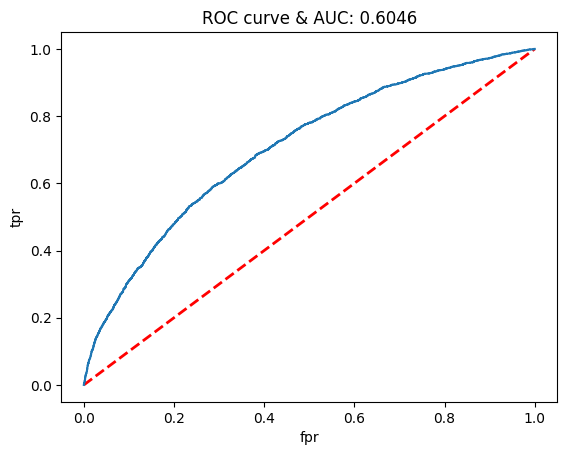

<Figure size 700x500 with 0 Axes>

In [130]:
fpr_model_final, tpr_model_final, thresholds_model_final = roc_curve(y_test.values, prediction_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0, 1], [0, 1], 'k--', c="red", linewidth=2)
plt.plot(fpr_model_final, tpr_model_final)
plt.title("ROC curve & AUC: " + str(roc_auc_score(y_test, y_pred).round(4)))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.figure(figsize=(7, 5))
plt.show()

### 5. ¿Qué variables son las que más influyen en la predicción?

### Feature Importance
* Ahora propongo ver la importancia de las variables utilizadas dentro del modelo de la regresión logistica. Esto se puede hacer a través de un Random Forest Classifier.
* También nos servirá como un "Bechmark" para nuestro primer modelo.

In [707]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# Modelo con las variables extraidas de la prueba chi-cuadrada

df_chi_q = df[['atraso_15','vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q = pd.get_dummies(df_chi_q, columns=['vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)

#Variables significativas extraidas de la prueba chi-cuadrada
X = df_chi_q.loc[:,list(chi_values_t2.variable)]

#Variables significativas extraidas de la prueba chi-cuadrada
cat_variables = list(chi_values_t2.variable)

y = df['atraso_15']

x_train, x_test, y_train, y_test = preprocess_split(X, y, #scale_x=True, 
                                                    random_state=5874,
                                                    cat_variables =cat_variables, 
                                                    test_size=0.2)
# define the model
model_rfc = RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=None,min_samples_split=5,min_samples_leaf=10,random_state=28347)

# fit the model
model_rfc.fit(x_train, y_train)
# get importance
importance = model_rfc.feature_importances_
df_importance = pd.DataFrame.from_dict({'variable':X.columns,'importance':importance})
df_importance = df_importance.sort_values(['importance'],ascending = False)
#df_importance.to_csv('df_importance.csv', sep=',', encoding='utf-8')
df_importance


,variable,importance
2,mes_7,0.066864
0,opera_Latin American Wings,0.050693
4,tipovuelo_N,0.048902
1,vlo_i_7663,0.037257
9,mes_12,0.030534
...,...,...
278,vlo_i_2600,0.000000
279,vlo_i_204,0.000000
280,vlo_i_1906,0.000000
281,vlo_i_1700,0.000000


In [708]:
#Test the model
y_pred_test = model_rfc.predict(x_test)

print("Reporte de Métricas")
print("-"*55)
report_var_sig = classification_report(y_test,y_pred_test)
print(report_var_sig)

print("Matriz de confusión")
print("-"*55)
confusion_matrix(y_test, y_pred_test)

Reporte de Métricas
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     11105
           1       0.71      0.05      0.09      2537

    accuracy                           0.82     13642
   macro avg       0.77      0.52      0.50     13642
weighted avg       0.80      0.82      0.75     13642

Matriz de confusión
-------------------------------------------------------


array([[11055,    50],
       [ 2413,   124]], dtype=int64)

El Recall es menor en este modelo (5%), por lo que la matriz de confusión de este modelo es peor que en el modelo regresión logistica.

Como ejercicio adicional al trabajo, trataré de buscar mejores hiperpartámetros usando la tecnica de "GridSearch" con un Random Forest Classifier

In [410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Modelo con las variables extraidas de la prueba chi-cuadrada

df_chi_q = df[['atraso_15','vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q = pd.get_dummies(df_chi_q, columns=['vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)

#Variables significativas extraidas de la prueba chi-cuadrada
X = df_chi_q.loc[:,list(chi_values_t2.variable)]

#Variables significativas extraidas de la prueba chi-cuadrada
cat_variables = list(chi_values_t2.variable)

y = df['atraso_15']

x_train, x_test, y_train, y_test = preprocess_split(X, y, #scale_x=True, 
                                                    random_state=5874,
                                                    cat_variables =cat_variables, 
                                                    test_size=0.2)

rfc = RandomForestClassifier(random_state=28347) #,min_samples_split=5

grid_rf = {'n_estimators': [500, 1000],'criterion': ["gini", "entropy"], "min_samples_leaf": [5, 10],"min_samples_split":[10, 15]}

gs_rf = GridSearchCV(rfc, param_grid=grid_rf, cv=5, scoring="recall", n_jobs=-1)

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=28347),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 15],
                         'n_estimators': [500, 1000]},
             scoring='recall')

In [425]:
model_rfc_v1 = gs_rf.best_estimator_
model_rfc_v1

RandomForestClassifier(min_samples_leaf=5, min_samples_split=10,
                       n_estimators=500, random_state=28347)

In [426]:
gs_rf.best_score_

0.0535870357241325

In [427]:
feature_importance_rfc_v1 = pd.DataFrame({'feature': x_train.columns.values,
                                  'importance': model_rfc_v1.feature_importances_})
feature_importance_rfc_v1.sort_values(by="importance", ascending=False).head()

,feature,importance
2,mes_7,0.054737
0,opera_Latin American Wings,0.038739
4,tipovuelo_N,0.038641
1,vlo_i_7663,0.028865
9,mes_12,0.026939


Se observa que al aplicar el GidSearch se siguen conservando las mismas variables dentro Top.

Conclusiones del proyecto.

Para esta primera versión de análisis (versión alfa), unicamente se contó con variables de tipo categóricas, por lo que para realizar un siguiente análisis (versión beta), se recomienda buscar y agregar los siguientes atributos numéricos y categorícos, con el objetivo de que aporten mayor información al entendimiento del negocio y a los modelos de ML:

* Tipo de avion
* Modelo del avion
* Número de pasajeros bordo
* Número de días desde la última afectación del mismo número de vuelo
* Peso de la carga a bordo en Kg
* Tiempo estimado de vuelo
* Capacidad máxima de pasajeros dentro delo avión
* Latitud y Longitud de origen
* Latitud y Longitud de destino
* Temperatura
* Presión
* Humedad
* Velocidad del viento
* % Nubosidad del origen
* Volumne de lluvia en la última hora
* Descripción del clima de origen
* Descripción del clima de destino

Al final, el mejor modelo es el que se construye con los datos que se cuenta, y en este caso, se intentó realizar una mejora del mismo, esto es, a través de realizar propuestas y algunos casos hipoteticos que podrían ser sugeridos al/por el cliente, quien al final, debe de tomar la decisión de cual modelo debemos dejar en productivo.

### Modelos con Redes Neuronales Artificiales

Para dar un valor agragado al trabajo aquí realizado, a continuación se ejecutarán 3 modelos de Red Neuronal Artificial.

In [428]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

df_chi_q = df[['atraso_15','vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q = pd.get_dummies(df_chi_q, columns=['vlo_i','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)

X = df_chi_q.loc[:,list(chi_values_t2.variable)]

#Variables significativas extraidas de la prueba chi-cuadrada
cat_variables = list(chi_values_t2.variable)

y = df['atraso_15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [429]:
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 318), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### Primera arquitectura de RNA

Epoch 1/40
853/853 [==============================] - 5s 5ms/step - loss: 0.4679 - recall: 0.0322 - val_loss: 0.4393 - val_recall: 0.0698 - lr: 0.0010
Epoch 2/40
853/853 [==============================] - 5s 6ms/step - loss: 0.4439 - recall: 0.0727 - val_loss: 0.4372 - val_recall: 0.0440 - lr: 0.0010
Epoch 3/40
853/853 [==============================] - 4s 5ms/step - loss: 0.4386 - recall: 0.0817 - val_loss: 0.4335 - val_recall: 0.0765 - lr: 0.0010
Epoch 4/40
853/853 [==============================] - 4s 5ms/step - loss: 0.4331 - recall: 0.1007 - val_loss: 0.4349 - val_recall: 0.1019 - lr: 0.0010
Epoch 5/40
853/853 [==============================] - 5s 6ms/step - loss: 0.4279 - recall: 0.1234 - val_loss: 0.4311 - val_recall: 0.1320 - lr: 0.0010
Epoch 6/40
853/853 [==============================] - 5s 6ms/step - loss: 0.4239 - recall: 0.1389 - val_loss: 0.4285 - val_recall: 0.1161 - lr: 0.0010
Epoch 7/40
853/853 [==============================] - 4s 5ms/step - loss: 0.4207 - recall: 0.1

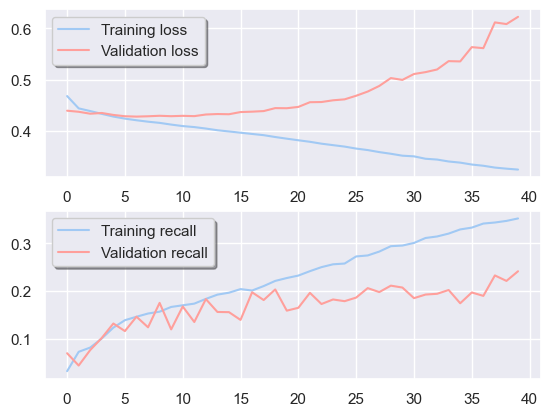

In [460]:
kernel_initializer = tf.keras.initializers.LecunNormal(seed=456)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,patience=1, min_lr=0.001,verbose=1)
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
#optimizer=tf.keras.optimizers.SGD(learning_rate=0.5)

model_rna_v1 = Sequential()
model_rna_v1.add(Dense(units = 64, input_dim = X_train.shape[1], activation = "gelu",kernel_initializer = kernel_initializer))
model_rna_v1.add(Dense(units = 32, activation = "gelu",kernel_initializer = kernel_initializer))
model_rna_v1.add(Dense(units = 16, activation = "gelu",kernel_initializer = kernel_initializer))
model_rna_v1.add(Dense(units = 8, activation = "gelu",kernel_initializer = kernel_initializer))
model_rna_v1.add(Dropout(0.2))
model_rna_v1.add(Dense(units = 1, activation = "sigmoid",kernel_initializer = kernel_initializer))
model_rna_v1.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["Recall"])

history = model_rna_v1.fit(X_train, y_train,  batch_size = 64, epochs = 40, verbose=1, validation_data=test_ds,callbacks=[reduce_lr])
#validation_split=0.1,callbacks=[reduce_lr]

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['recall'], color='b', label="Training recall")
ax[1].plot(history.history['val_recall'], color='r',label="Validation recall")
legend = ax[1].legend(loc='best', shadow=True)

test_loss, test_recall = model_rna_v1.evaluate(X_test, y_test)
print("Test recall: {}".format(test_recall))

In [486]:
test_loss, test_recall = model_rna_v1.evaluate(X_test, y_test)
print("Test recall: {}".format(test_recall))

427/427 [==============================] - 1s 2ms/step - loss: 0.6139 - recall: 0.2414
Test recall: 0.24137930572032928


In [487]:
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, xticklabels=Label, yticklabels=Label, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
#    plt.savefig("confusion_matrix.png", bbox_inches='tight')
    plt.show()

427/427 [==============================] - 1s 2ms/step


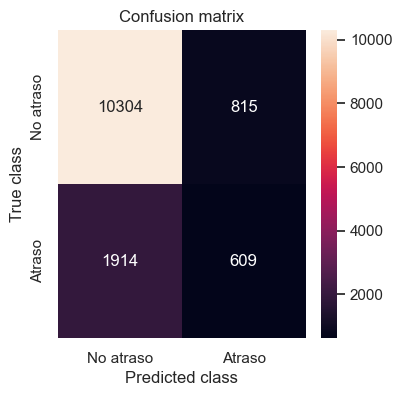

In [488]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn.metrics import confusion_matrix

Y_pred  = model_rna_v1.predict(X_test)

labels_rna = [1 if prediction >= 0.5 else 0
                      for prediction in Y_pred]
labels_rna

Label = ['No atraso','Atraso']

plot_confusion_matrix(y_test,labels_rna)

### Segunda arquitectura de RNA

Epoch 1/40
852/853 [============================>.] - ETA: 0s - loss: 0.4573 - recall: 0.0589
Epoch 1: val_loss improved from inf to 0.44029, saving model to model-0.44.h5
853/853 [==============================] - 8s 8ms/step - loss: 0.4572 - recall: 0.0590 - val_loss: 0.4403 - val_recall: 0.0824 - lr: 0.0010
Epoch 2/40
847/853 [============================>.] - ETA: 0s - loss: 0.4434 - recall: 0.0869
Epoch 2: val_loss improved from 0.44029 to 0.43728, saving model to model-0.44.h5
853/853 [==============================] - 7s 8ms/step - loss: 0.4434 - recall: 0.0868 - val_loss: 0.4373 - val_recall: 0.0547 - lr: 0.0010
Epoch 3/40
852/853 [============================>.] - ETA: 0s - loss: 0.4405 - recall: 0.0849
Epoch 3: val_loss did not improve from 0.43728
853/853 [==============================] - 7s 8ms/step - loss: 0.4404 - recall: 0.0850 - val_loss: 0.4387 - val_recall: 0.0801 - lr: 0.0010
Epoch 4/40
847/853 [============================>.] - ETA: 0s - loss: 0.4385 - recall: 0.09

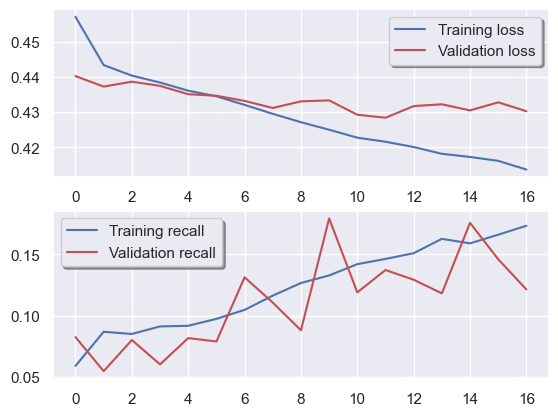

In [480]:
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.001, verbose=1, mode="min")
stop = EarlyStopping(monitor="val_loss", patience=5, mode="min")

callbacks=[checkpoint, reduce_lr, stop]

kernel_initializer = tf.keras.initializers.LecunNormal(seed=456)
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
#optimizer=tf.keras.optimizers.SGD(learning_rate=0.5)

model_rna_v2 = Sequential()
model_rna_v2.add(Dense(units = 64, input_dim = X_train.shape[1], activation = "elu",kernel_initializer = kernel_initializer))
model_rna_v2.add(Dense(units = 32, activation = "elu",kernel_initializer = kernel_initializer))
model_rna_v2.add(Dense(units = 16, activation = "elu",kernel_initializer = kernel_initializer))
model_rna_v2.add(Dense(units = 8, activation = "elu",kernel_initializer = kernel_initializer))
model_rna_v2.add(Dropout(0.2))
model_rna_v2.add(Dense(units = 1, activation = "sigmoid",kernel_initializer = kernel_initializer))
model_rna_v2.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["Recall"])

history = model_rna_v2.fit(X_train, y_train, batch_size = 64, epochs = 40, verbose=1, validation_data=test_ds, callbacks=callbacks)
#validation_split=0.1

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['recall'], color='b', label="Training recall")
ax[1].plot(history.history['val_recall'], color='r',label="Validation recall")
legend = ax[1].legend(loc='best', shadow=True)

test_loss, test_recall = model_rna_v2.evaluate(X_test, y_test)
print("Test recall: {}".format(test_recall))


In [483]:
test_loss, test_recall = model_rna_v2.evaluate(X_test, y_test)
print("Test recall: {}".format(test_recall))

427/427 [==============================] - 1s 3ms/step - loss: 0.4303 - recall: 0.1213
Test recall: 0.12128418684005737


427/427 [==============================] - 1s 3ms/step


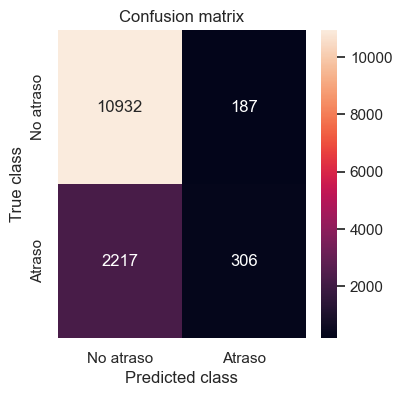

In [484]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn.metrics import confusion_matrix

Y_pred  = model_rna_v2.predict(X_test)

labels_rna = [1 if prediction >= 0.5 else 0
                      for prediction in Y_pred]
labels_rna

Label = ['No atraso','Atraso']

plot_confusion_matrix(y_test,labels_rna)

### Tercera arquitectura de RNA

Epoch 1/40
853/853 [==============================] - 6s 7ms/step - loss: 0.4564 - recall: 0.0650 - val_loss: 0.4418 - val_recall: 0.0975
Epoch 2/40
853/853 [==============================] - 5s 6ms/step - loss: 0.4432 - recall: 0.0842 - val_loss: 0.4385 - val_recall: 0.0709
Epoch 3/40
853/853 [==============================] - 5s 6ms/step - loss: 0.4391 - recall: 0.0929 - val_loss: 0.4364 - val_recall: 0.0690
Epoch 4/40
853/853 [==============================] - 5s 6ms/step - loss: 0.4366 - recall: 0.0940 - val_loss: 0.4339 - val_recall: 0.0777
Epoch 5/40
853/853 [==============================] - 6s 7ms/step - loss: 0.4334 - recall: 0.1079 - val_loss: 0.4342 - val_recall: 0.0963
Epoch 6/40
853/853 [==============================] - 6s 8ms/step - loss: 0.4309 - recall: 0.1123 - val_loss: 0.4323 - val_recall: 0.1304
Epoch 7/40
853/853 [==============================] - 5s 6ms/step - loss: 0.4284 - recall: 0.1228 - val_loss: 0.4306 - val_recall: 0.0963
Epoch 8/40
853/853 [==============

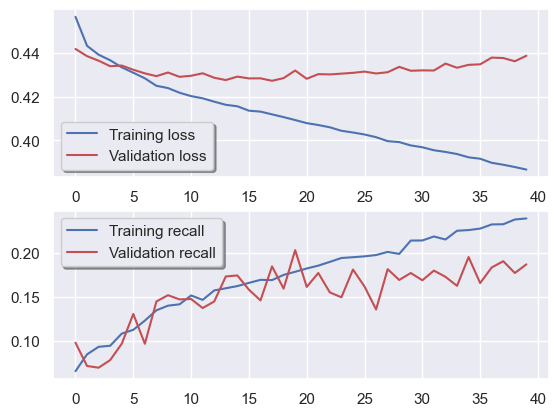

In [490]:
kernel_initializer = tf.keras.initializers.LecunNormal(seed=456)

#reduce_lr = ReduceLROnPlateau(monitor='val_recall', factor=0.5,
#                              patience=5, min_lr=0.0001 )

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

model_rna_v3 = Sequential()
model_rna_v3.add(Dense(units = 64, input_dim = X_train.shape[1], activation = "elu",kernel_initializer = kernel_initializer, ))
model_rna_v3.add(Dense(units = 32, activation = "elu",kernel_initializer = kernel_initializer, ))
model_rna_v3.add(Dense(units = 16, activation = "elu",kernel_initializer = kernel_initializer))
#model_rna_v3.add(Dropout(0.2))
model_rna_v3.add(Dense(units = 8, activation = "elu",kernel_initializer = kernel_initializer))
model_rna_v3.add(Dropout(0.2))
model_rna_v3.add(Dense(units = 1, activation = "sigmoid",kernel_initializer = kernel_initializer))
#model_rna_v3.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model_rna_v3.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["Recall"])

#model_rna_v3.fit(X_train, y_train,  batch_size = 32, epochs = 5, verbose=1,)

history = model_rna_v3.fit(X_train, y_train,  batch_size = 64, epochs = 40, verbose=1,
                    #validation_split=0.1)
                    validation_data=test_ds)#,callbacks=[reduce_lr])

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['recall'], color='b', label="Training recall")
ax[1].plot(history.history['val_recall'], color='r',label="Validation recall")
legend = ax[1].legend(loc='best', shadow=True)

test_loss, test_recall = model_rna_v3.evaluate(X_test, y_test)
print("Test recall: {}".format(test_recall))

In [491]:
test_loss, test_recall = model_rna_v3.evaluate(X_test, y_test)
print("Test recall: {}".format(test_recall))

427/427 [==============================] - 1s 3ms/step - loss: 0.4387 - recall: 0.1871
Test recall: 0.18707887828350067


427/427 [==============================] - 1s 3ms/step


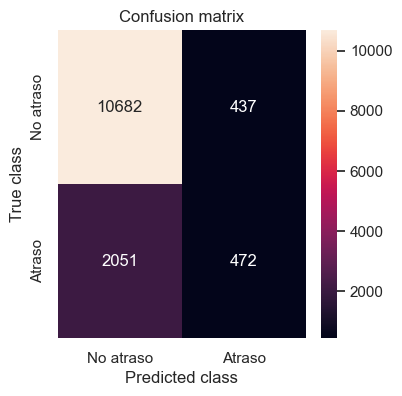

In [492]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn.metrics import confusion_matrix

Y_pred  = model_rna_v3.predict(X_test)

labels_rna = [1 if prediction >= 0.5 else 0
                      for prediction in Y_pred]
labels_rna

Label = ['No atraso','Atraso']

plot_confusion_matrix(y_test,labels_rna)

El primer modelo de RNA presenta un mejor desempeño respecto al modelo de regresión logistica, ya que el recall obtenido por la RNA fue de 24%, mientras que el obtenido por modelo de regresión logistica era de 9% para esta misma métrica.

En general, para mejorar los resultados recomiento necesario aumentar la cantidad de datos y/o tener más variables para entrenamiento del mismo.

Conclusiones Personales

* Disfruté mucho haciendo este ejercicio, ya que pude hacer todas las fases un proyecto de Ciencia de Datos (EDA, featuring engineering, selección de variables y la contrucción de diferentes modelos de ML).
* Creo que el ejercicio es muy interesante, ya que se trabaja con variables categóricas y esto es necesario en algunas ocasiones.
* Como siguientes pasos, trataría de buscar la forma de construir o encontrar más variables para entrenar los mismos modelos, así como algunos otros.